# Threads of Understanding: A CNN Approach to Fashion MNIST Image Classification

**Instructions** : Kindly use T4 accelarator (GPU) in colab to run the code.

## Problem Statement

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

**Labels**

Each training and test example is assigned to one of the following labels:

 -   0 T-shirt/top
 -   1 Trouser
 -   2 Pullover
 -   3 Dress
 -   4 Coat
 -   5 Sandal
 -   6 Shirt
 -   7 Sneaker
 -   8 Bag
 -   9 Ankle boot

### Objective or Goal

Our objective in this academic endeavor was to navigate the complexities of model selection, training, and evaluation. Because of the diversity included in the Fashion MNIST dataset, it is necessary to carefully weigh the advantages
and disadvantages of different machine learning architectures. Prioritizing different evaluation metrics and gaining a deeper understanding of the elements driving model performance was our main objective when we set out on this trip. This will help us make well-informed decisions in practical applications down
the road.

### Reading and Understanding Dataset

In [ ]:
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.python import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import classification_report,confusion_matrix

##### Loading the dataset

In [ ]:
# Loading Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Displaying their shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


The Fashion-MNIST dataset of Zalando's article images which contains 60,000 grayscale images of a training set and 10,000 of test set in 10 categories. The images show individual articles of clothing at 28X28 pixels resolution.

##### Creating a dataframe with the series

In [ ]:
# Reshaping the image data to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Creating dataframe for training and testing data
train_df = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
train_df['label'] = y_train

test_df = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])
test_df['label'] = y_test

# Concatenating training and testing dataframe into 1 dataframe
df = pd.concat([train_df, test_df], ignore_index=True)

print("Shape of the concatenated DataFrame:", df.shape)
print(df.head())

Shape of the concatenated DataFrame: (70000, 785)
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...        114        130         76          0   
2        0       22  ...          0          1          0          0   
3       33       96  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_7

### Analysis on the data

In [ ]:
# Basic information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel_0 to label
dtypes: uint8(785)
memory usage: 52.4 MB


The dataframe statistics indicate that there are 70,000 rows and 785 features in the (training + testing) dataset. Each row represents an image that will be used during model training and testing.

In [ ]:
# Displaying shape, size and columns of the dataframe

print("Shape of the DataFrame:", df.shape)
print("Size in the DataFrame:", df.size)
print("Columns in the DataFrame:", df.columns)

Shape of the DataFrame: (70000, 785)
Size in the DataFrame: 54950000
Columns in the DataFrame: Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'label'],
      dtype='object', length=785)


In [ ]:
# Displaying summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            pixel_0       pixel_1       pixel_2       pixel_3       pixel_4  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000771      0.006414      0.034486      0.098886      0.247843   
std        0.087339      0.296605      1.200882      2.458872      4.408110   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     45.000000    218.000000    185.000000    227.000000   

            pixel_5       pixel_6       pixel_7       pixel_8      pixel_9  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.00000   
mean       0.408714      0.802900      2.204386      5.634900     14.41000   
std        5.842288      8.186472 

9    7000
0    7000
3    7000
2    7000
7    7000
5    7000
1    7000
6    7000
4    7000
8    7000
Name: label, dtype: int64


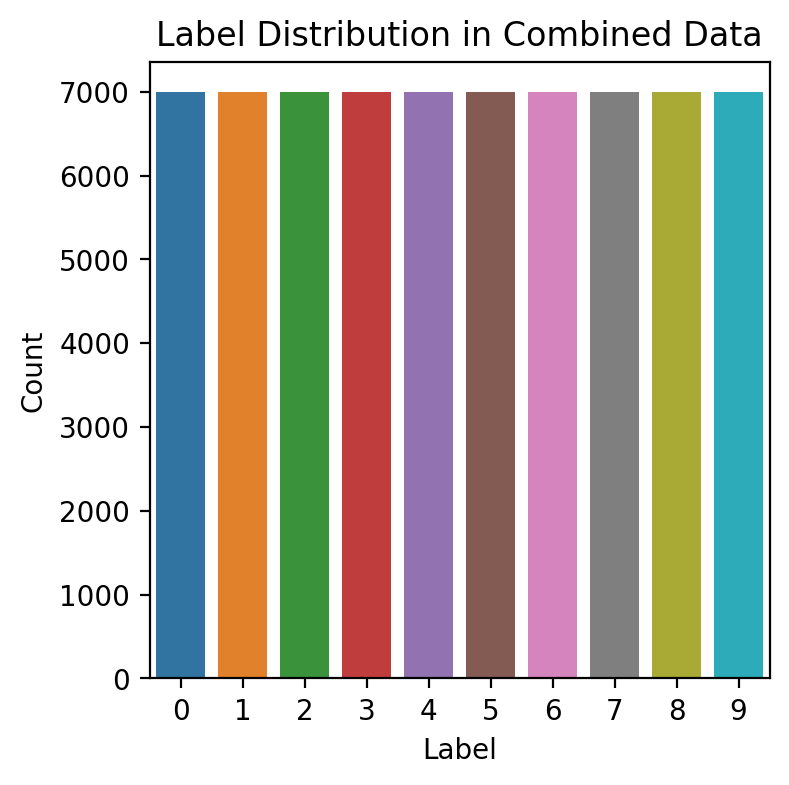

In [ ]:
# Class distribution of the image dataset

print(df['label'].value_counts())

# Plotting it as a countplot
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='label')
plt.title("Label Distribution in Combined Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

From the above countplot we can observe that there are no class imbalances in this image dataset. All classes have equal items (7000) present in them.

In [ ]:
# Getting unique label values

class_num = set(df['label'])
print(class_num)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


##### Reducing the dimensions for visualization by PCA

In [ ]:
# Computing the explained variance and cummulative explained variance
pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

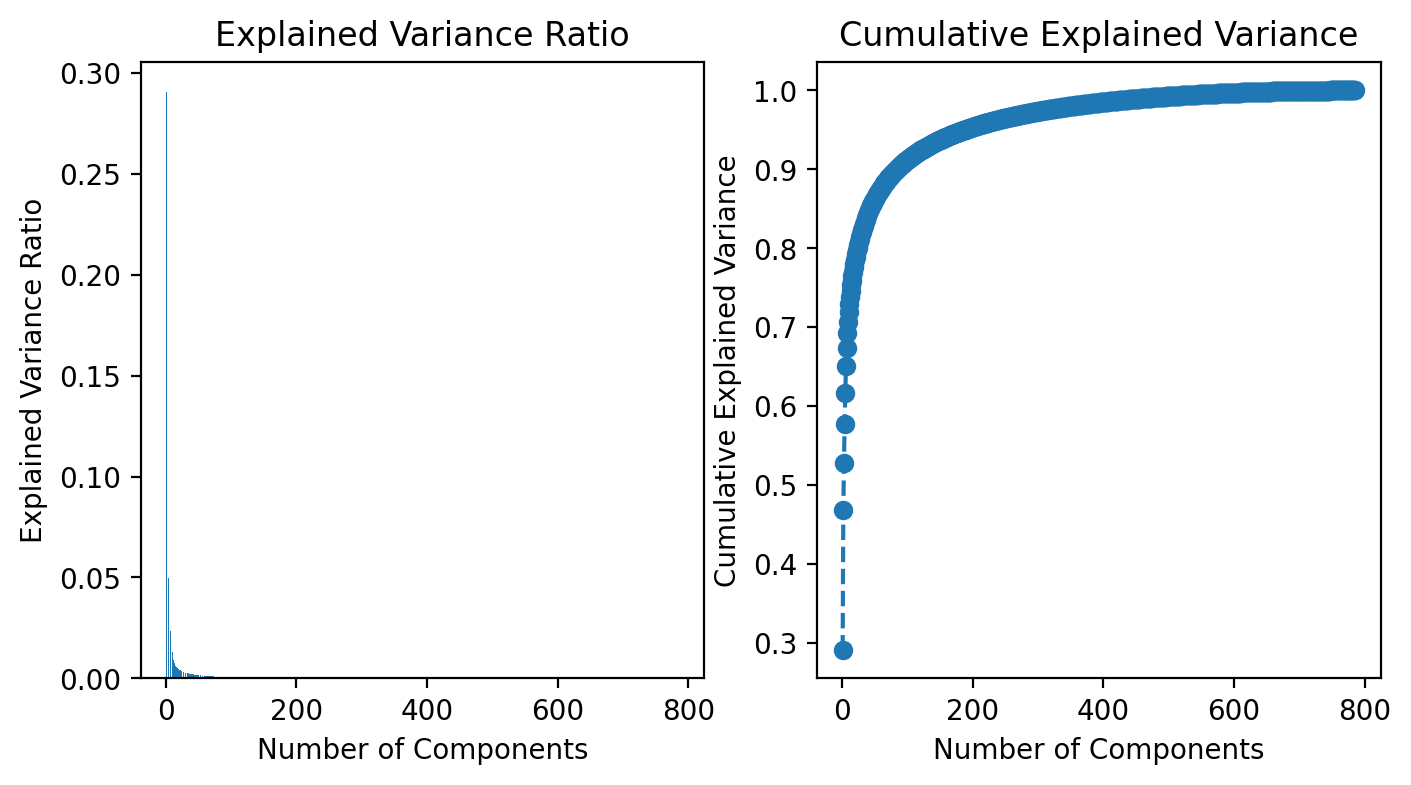

In [ ]:
# Plotting the explained variance ratio
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio")

# Plotting the cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")

plt.show()

In [ ]:
cumulative_variance[3]

0.5776903875677912

<Figure size 2000x1600 with 0 Axes>

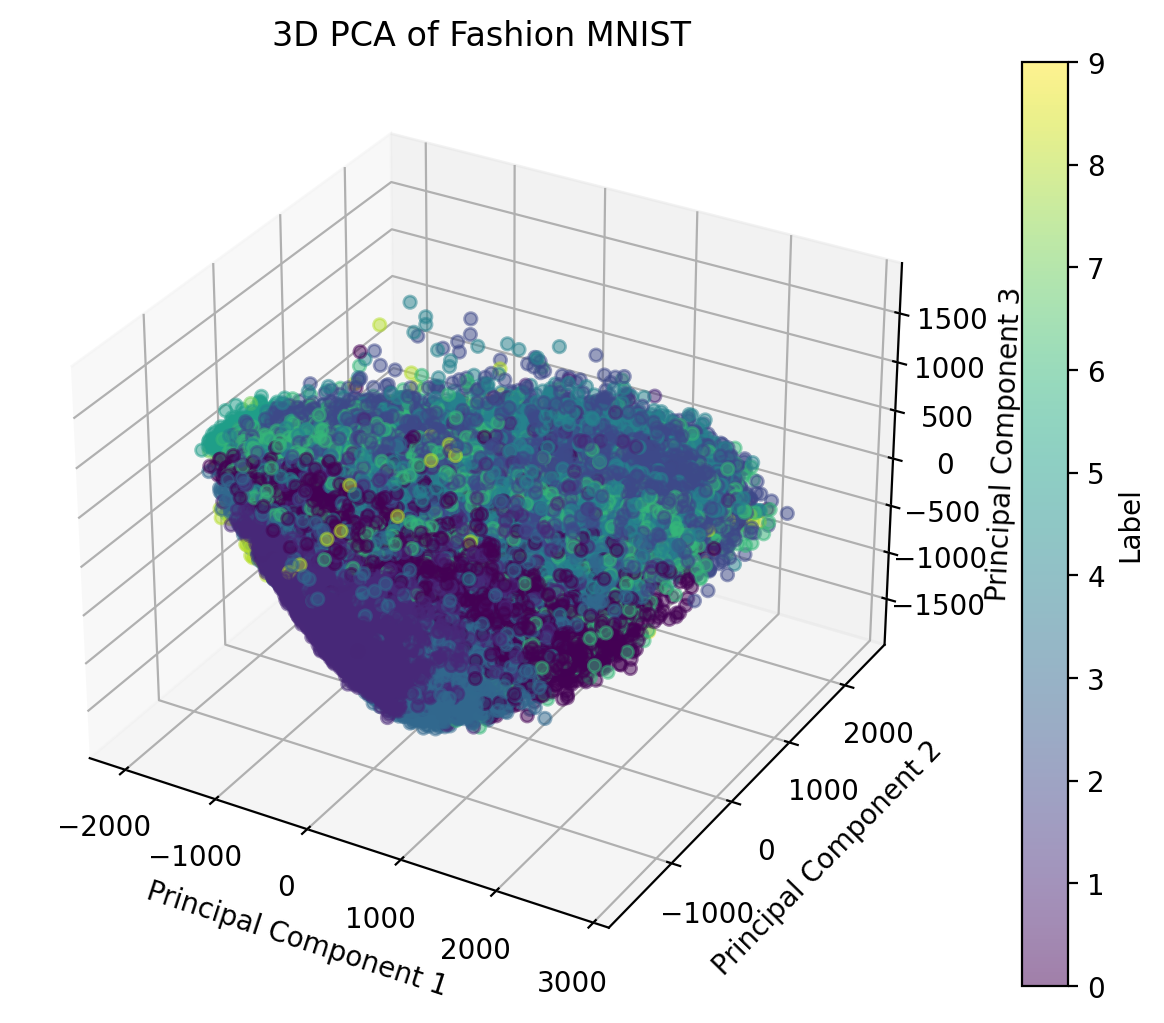

In [ ]:
# Plotting only PC1, PC2 and PC3 for visualization (Explains 57.76% variance)

plt.figure(figsize=(10, 8))

# Extracting the target 'label' from the dataframe before PCA
X = df.drop(columns=["label"])

# Performing PCA for 3 components
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Creating a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, n_components + 1)])

# Adding the 'label' column to the PCA dataframe
pca_df['label'] = df['label']

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Creating a scatter plot
scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["label"], cmap="viridis", alpha=0.5)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA of Fashion MNIST")

# Adding a colorbar
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Label')

plt.show()

##### Displaying an image from each class for visualization

In [ ]:
target_class = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

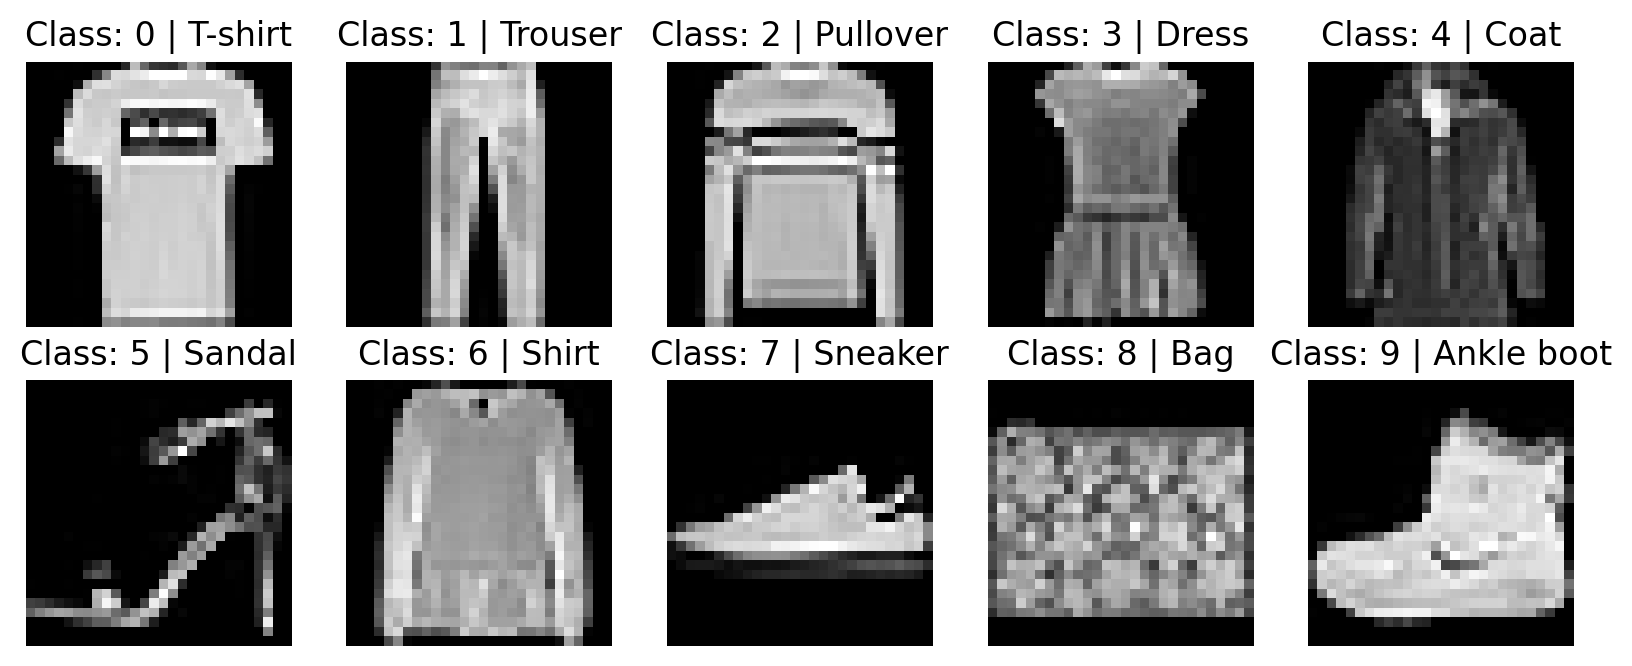

In [ ]:
# Creating a dictionary to store the indices of the first occurrence of each class
class_indices = {}

# Finding the indices of the first occurrence of each class
for i, lbl in enumerate(df['label']):
    if lbl not in class_indices:
        class_indices[lbl] = i

# Displaying one image from each class
plt.figure(figsize=(10, 10))
for i, label in enumerate(sorted(class_indices.keys())):
    plt.subplot(5, 5, i+1)
    index = class_indices[label]
    plt.imshow(df.iloc[index, :-1].values.reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.title("Class: " + str(label) + " | " + target_class[i])
    plt.axis('off')

plt.show()

Pixel intensity distribution

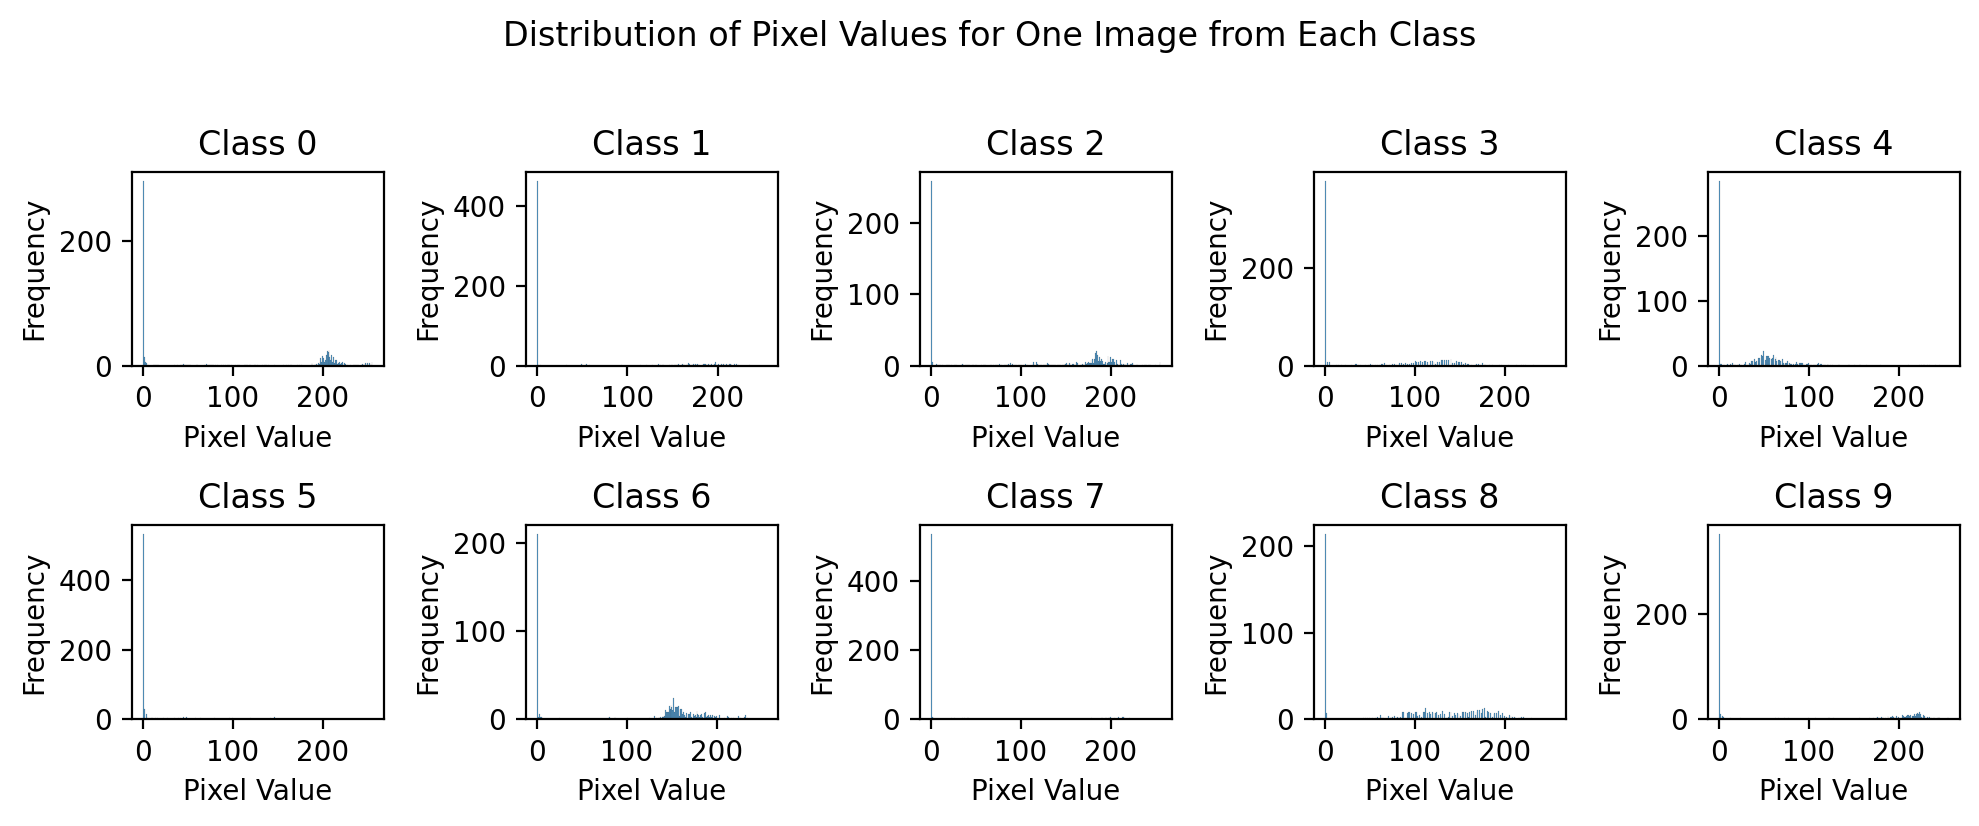

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
fig.suptitle('Distribution of Pixel Values for One Image from Each Class', y=1.02)

for class_label, ax in zip(class_num, axes.flatten()):
    selected_image = df[df['label'] == class_label].iloc[0, :-1]

    pixel_values = selected_image.values

    sns.histplot(pixel_values, bins=256, label=f'Class {class_label}', ax=ax)
    ax.set_title(f'Class {class_label}')
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Splitting the data into Training, Validation and Testing tests

Splitting the data to Train, validation and Test in a 60:20:20 ratio

In [ ]:
# Specifying the proportion for train, validation, and test sets
train_size = 0.6
val_size = 0.2
test_size = 0.2

X = df.iloc[:, :-1]
y = df['label']

# Splitting the data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_size), random_state=42)

# Splitting the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_size / (val_size + test_size)), random_state=42)

# Displaying their shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_vali shape:", X_val.shape)
print("y_vali shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 784)
y_train shape: (42000,)
X_vali shape: (14000, 784)
y_vali shape: (14000,)
X_test shape: (14000, 784)
y_test shape: (14000,)


In [ ]:
# Assuming y_train, y_val and y_test are integer-encoded labels

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Reshaping the features to 28x28x1
X_train = X_train.values.reshape((-1, 28, 28, 1))
X_val = X_val.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))

# Displaying their new shapes
print("X_train_reshaped shape:", X_train.shape)
print("X_vali_reshaped shape:", X_val.shape)
print("X_test_reshaped shape:", X_test.shape)
print("y_train_reshaped shape:", y_train.shape)
print("y_vali_reshaped shape:", y_val.shape)
print("y_test_reshaped shape:", y_test.shape)

X_train_reshaped shape: (42000, 28, 28, 1)
X_vali_reshaped shape: (14000, 28, 28, 1)
X_test_reshaped shape: (14000, 28, 28, 1)
y_train_reshaped shape: (42000, 10)
y_vali_reshaped shape: (14000, 10)
y_test_reshaped shape: (14000, 10)


##### Normalizing the dataset

We can normalize the X_train, X_val, X_test data by scaling the pixel values to a range between 0 and 1. This normalization helps the model converge faster during training.

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

X_train, X_val, and X_test represent the pixel values of the images in your training, validation, and test sets, respectively. The division by 255.0 scales the pixel values to the range [0, 1], as the original pixel values are in the range [0, 255].

### Fitting the Models

#### Model 1 - Artificial Neural Network

Building the neural network model requires setting up the layers of the model, and then compiling the model.

We are using the Sequential Keras model followed by the Flattening layer to convert multidimensional parameters to vectors as our input layer. We have 2 dense hidden layers with the ReLU activation function.

The ReLU activation functions introduce non-linearity to the model, and the Softmax activation in the output layer provides normalized probabilities for each class.

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


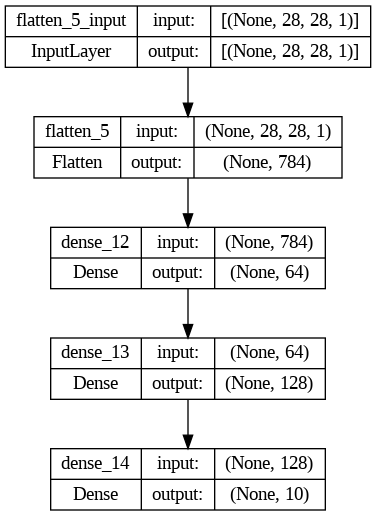

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model_architecture_ANN.png',
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
weight1 = model.layers[1].get_weights()

In [ ]:
weight1[0].shape, weight1[1].shape

((784, 64), (64,))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5386 - accuracy: 0.8097 - val_loss: 0.4283 - val_accuracy: 0.8510
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3988 - accuracy: 0.8548 - val_loss: 0.3813 - val_accuracy: 0.8629
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3587 - accuracy: 0.8701 - val_loss: 0.3478 - val_accuracy: 0.8737
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3357 - accuracy: 0.8767 - val_loss: 0.3474 - val_accuracy: 0.8736
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3127 - accuracy: 0.8840 - val_loss: 0.3615 - val_accuracy: 0.8691
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8885 - val_loss: 0.3228 - val_accuracy: 0.8830
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2838 - accuracy: 0.8943 - val_loss: 0.3400 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

<Figure size 1200x1200 with 0 Axes>

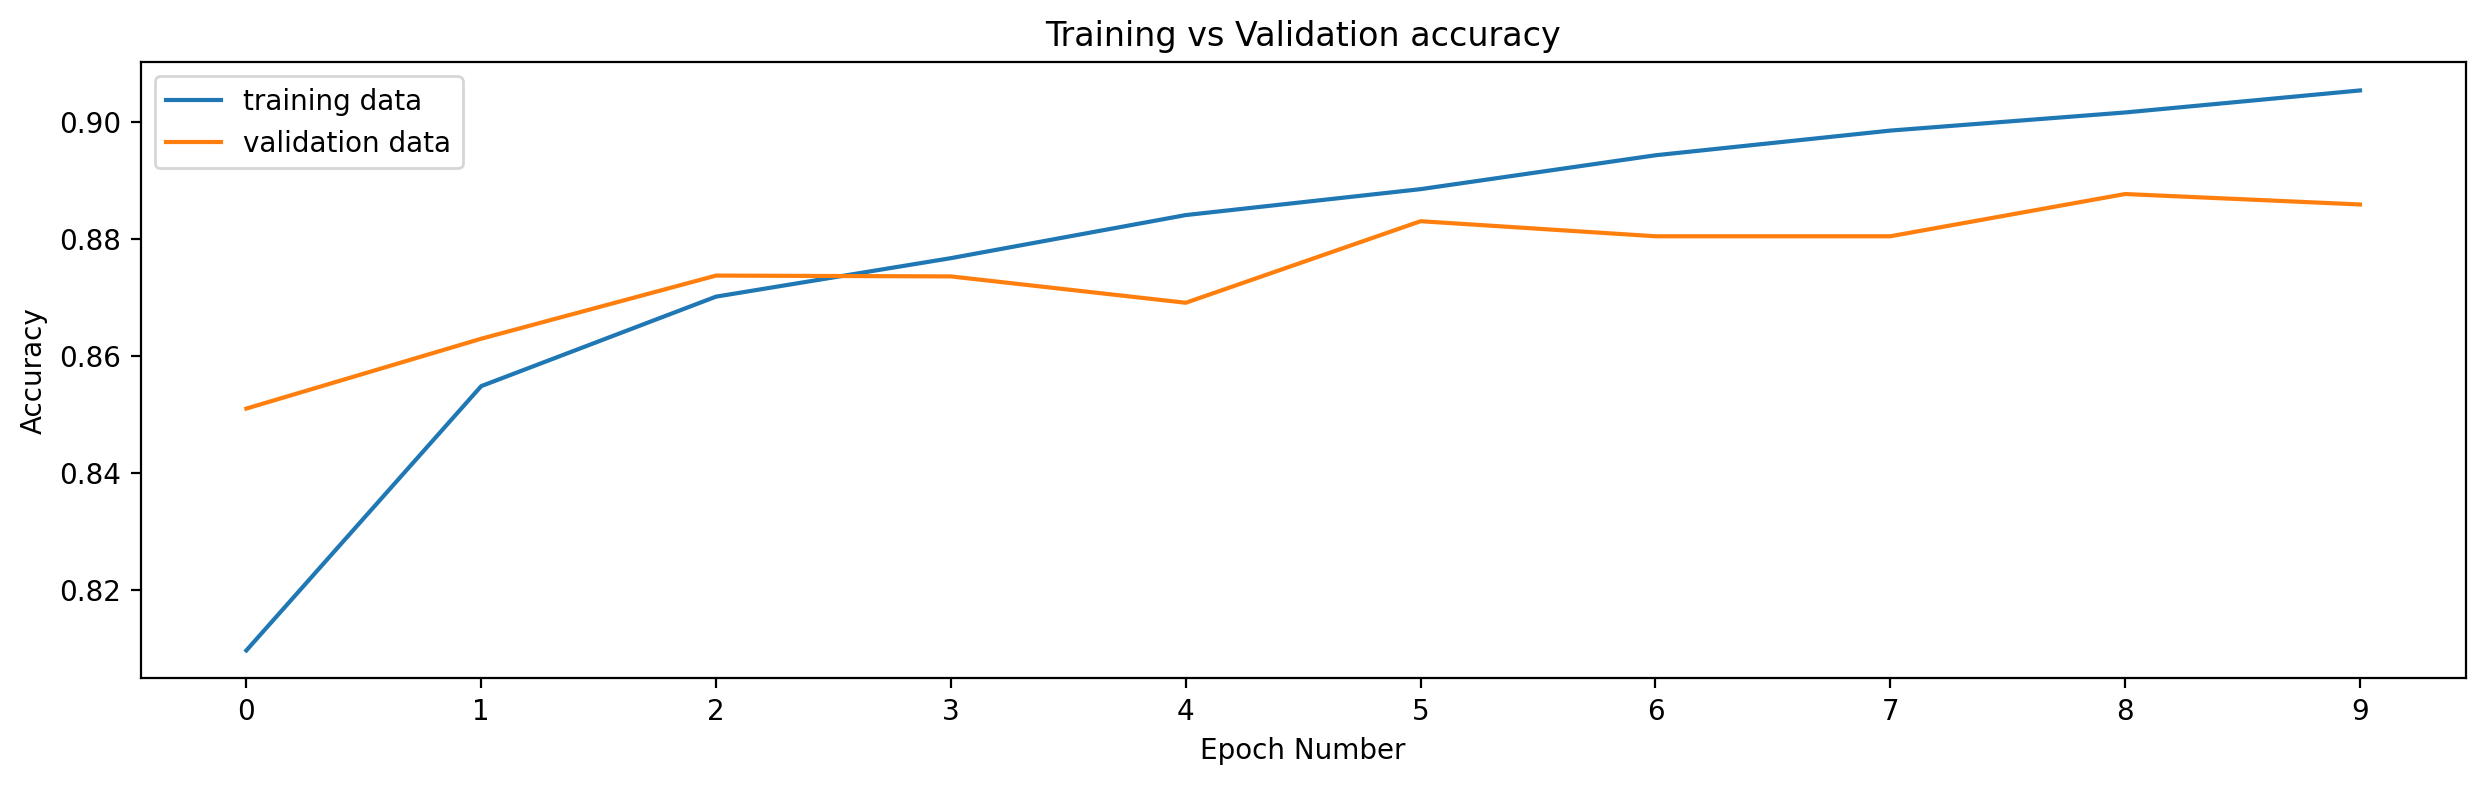

In [ ]:
# Accuracy plot curve for Training and Validation

plt.figure(figsize=(6, 6))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

<Figure size 1200x1200 with 0 Axes>

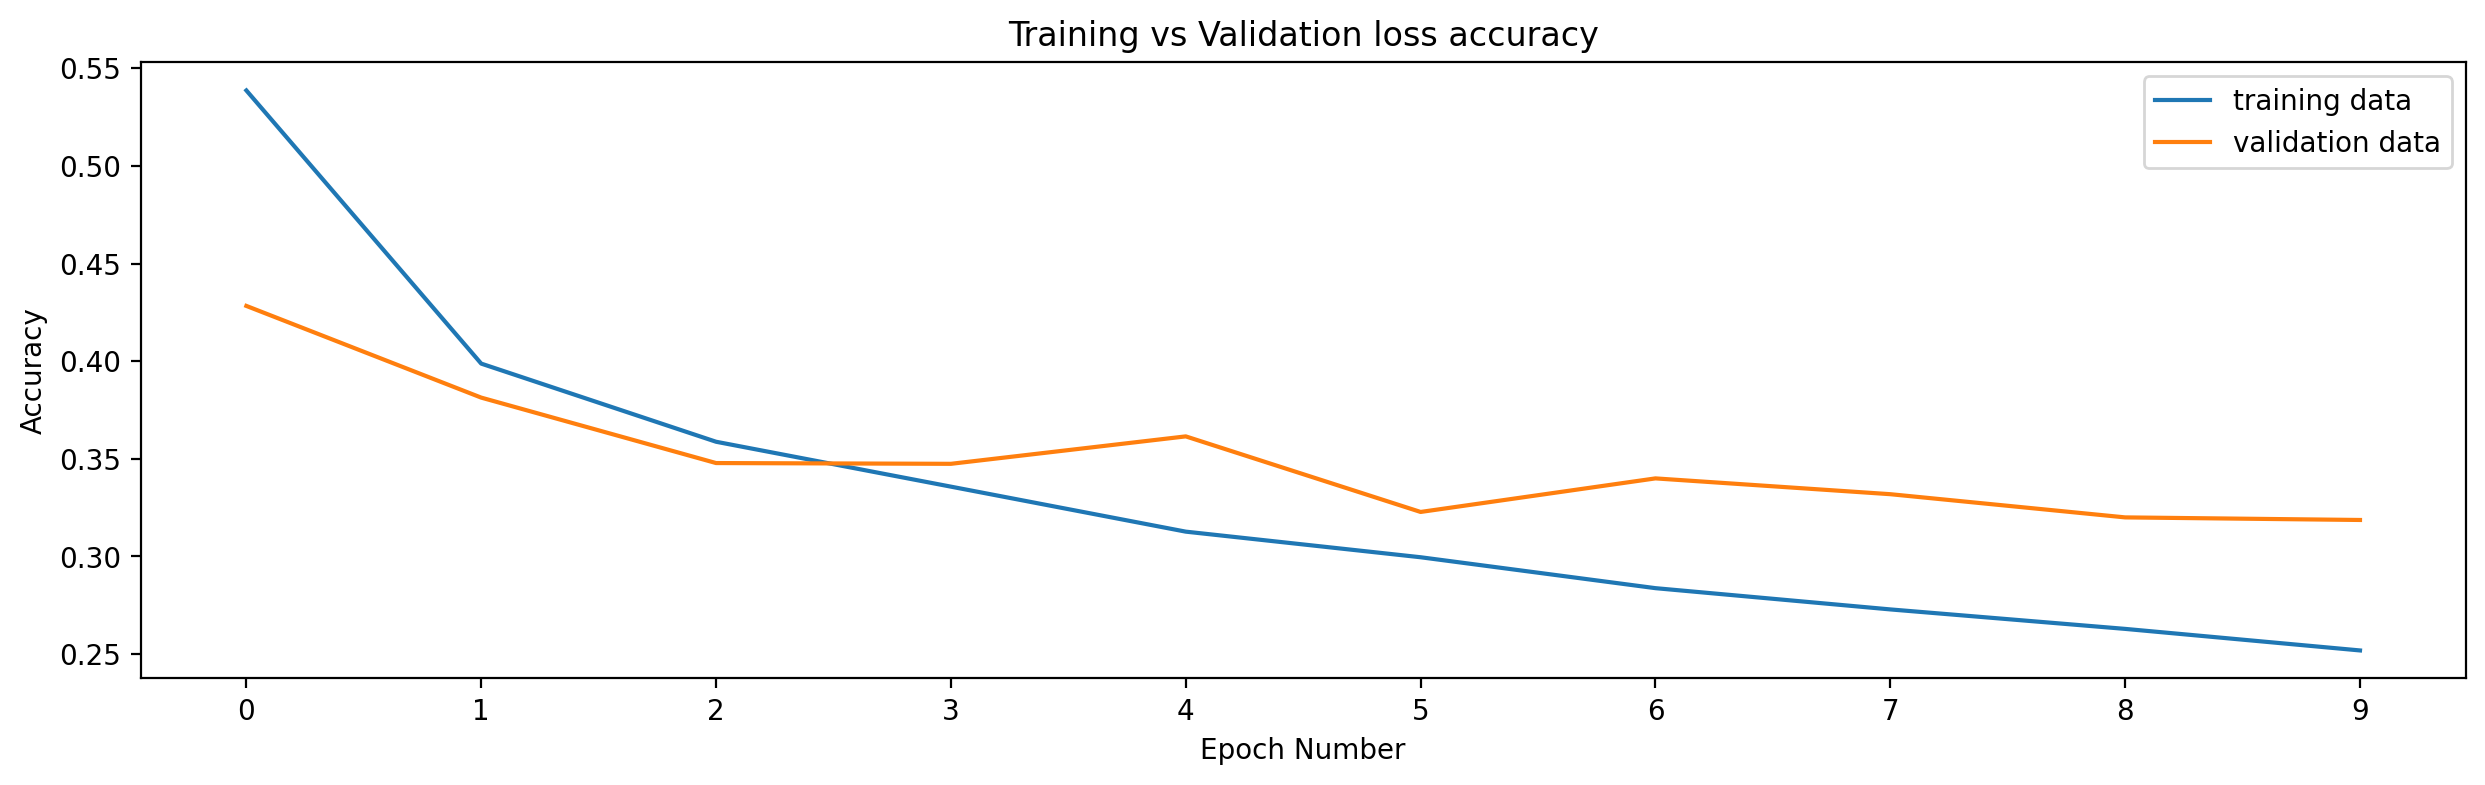

In [ ]:
# Loss plot curve for training and validation

plt.figure(figsize=(6, 6))
losses[['loss','val_loss']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation loss accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

In [ ]:
# Calculating train accuracy

print("Train dataset")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss: ", train_loss)
print("Train Accuracy: ", train_accuracy)

Train dataset
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2346 - accuracy: 0.9109
Train Loss:  0.23461602628231049
Train Accuracy:  0.9109285473823547


In [ ]:
# Calculating validation accuracy

print("Validation dataset")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

Validation dataset
438/438 [==============================] - 1s 3ms/step - loss: 0.3187 - accuracy: 0.8859
Validation Loss:  0.31867071986198425
Validation Accuracy:  0.8858571648597717


In [ ]:
# Calculating test accuracy

print("Test accuracy")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test accuracy
438/438 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8787
Test Loss:  0.3299430310726166
Test Accuracy:  0.8787142634391785


In [ ]:
predictions = model.predict(X_test)

predicted_labels_0 = np.argmax(predictions,axis=1)
y_test0 = np.argmax(y_test, axis=1)

438/438 [==============================] - 1s 2ms/step


###### Classification Report

In [ ]:
# Classification report

print(classification_report(y_test0,predicted_labels_0))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1362
           1       0.98      0.98      0.98      1386
           2       0.71      0.88      0.79      1390
           3       0.85      0.91      0.88      1444
           4       0.82      0.77      0.79      1391
           5       0.97      0.96      0.96      1432
           6       0.77      0.60      0.67      1404
           7       0.93      0.95      0.94      1387
           8       0.97      0.98      0.97      1403
           9       0.96      0.95      0.96      1401

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



1/1 [==============================] - 0s 17ms/step


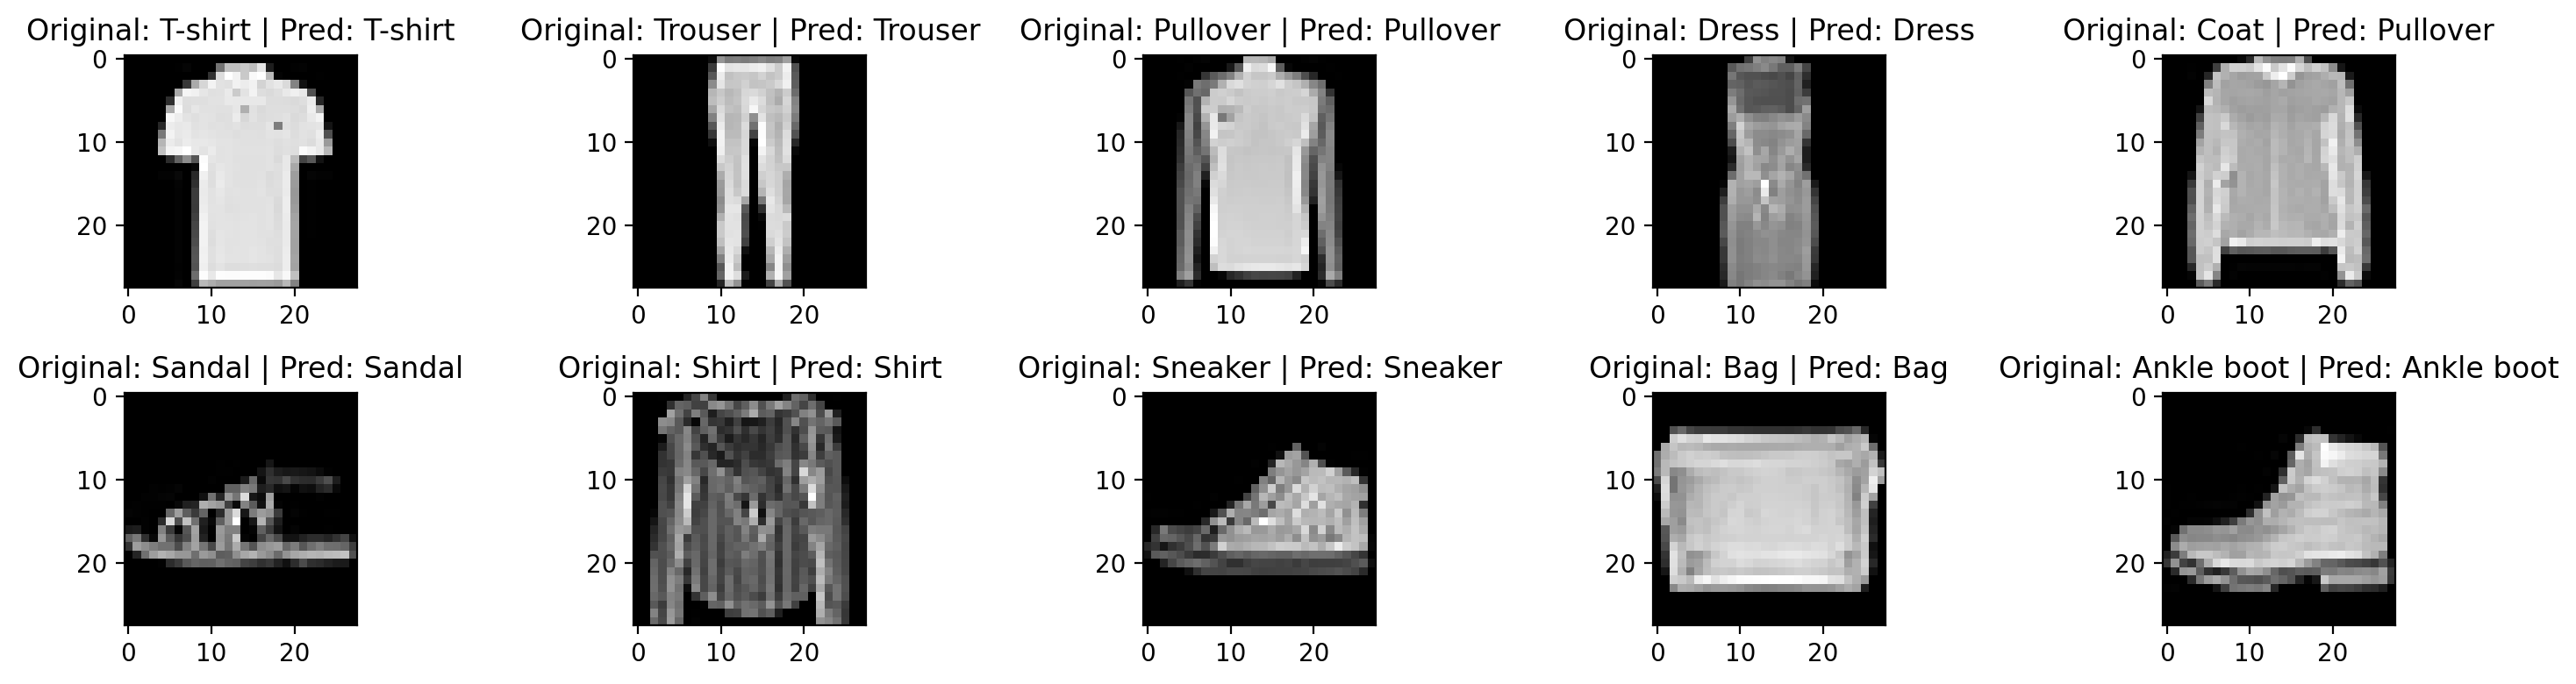

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in class_num:
    plt.subplot(2, 5, i + 1)

    df_new = df[df['label'] == i].iloc[255]
    test = df_new.drop('label').to_numpy().reshape(28, 28)

    plt.imshow(test, cmap='gray')

    pred = model.predict(test.reshape(1, 28, 28, 1))
    idx = np.argmax(pred[0])
    pred_class = target_class[idx]

    plt.title('Original: {} | Pred: {}'.format(target_class[i], pred_class))

plt.tight_layout()
plt.show()

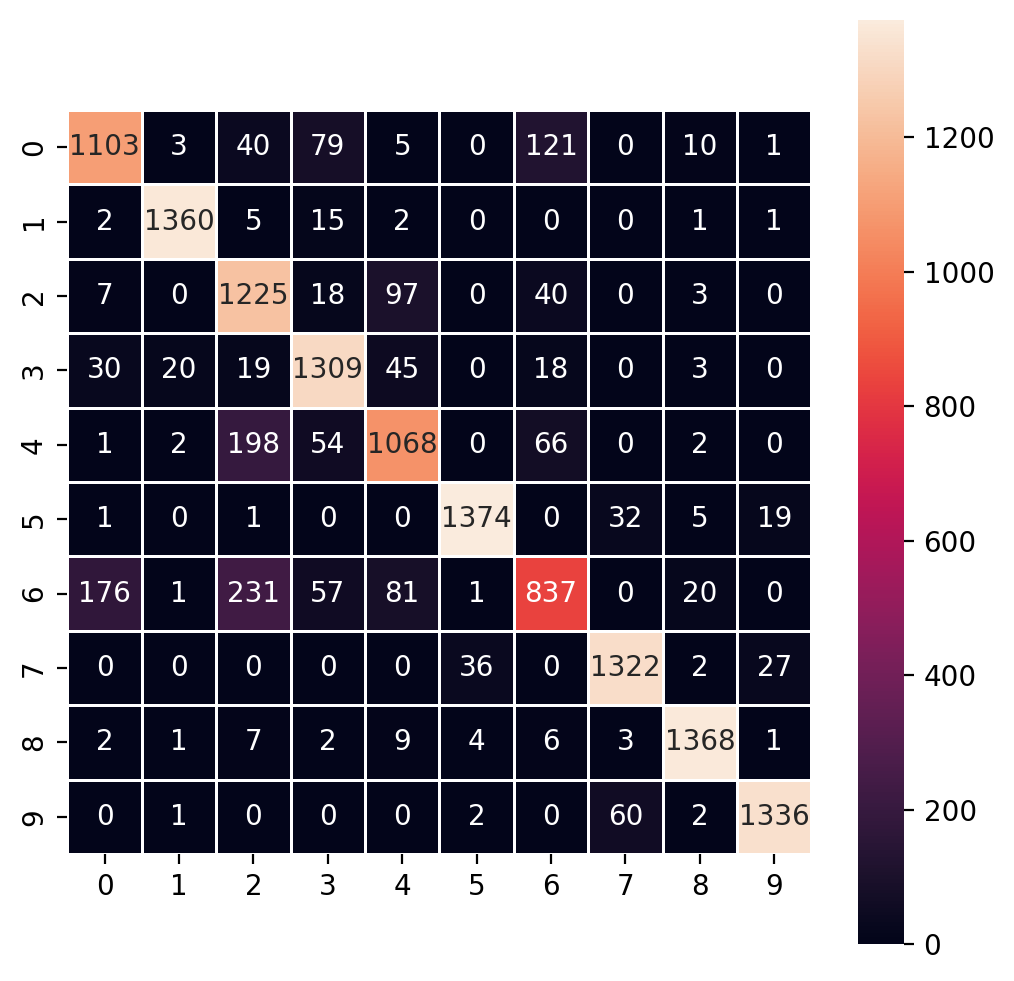

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test0, predicted_labels_0)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()

#### Model 2 - Convoluted neural Network (CNN1)

Building the neural network model requires setting up the layers of the model, then compiling the model.

We are using Sequential Keras model which has a Convolution2D and MaxPooling2D layer. The MaxPooling layer acts as a sort of downsampling using max values in a region. After that we will use Flatten layer to convert multidimensional parameters to vector. We have a dense hidden layer with 128 neurons learn intricate patterns with the ReLU activation function.

The ReLU activation functions introduce non-linearity to the model, and the Softmax activation in the output layer provides normalized probabilities for each class.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               589952    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

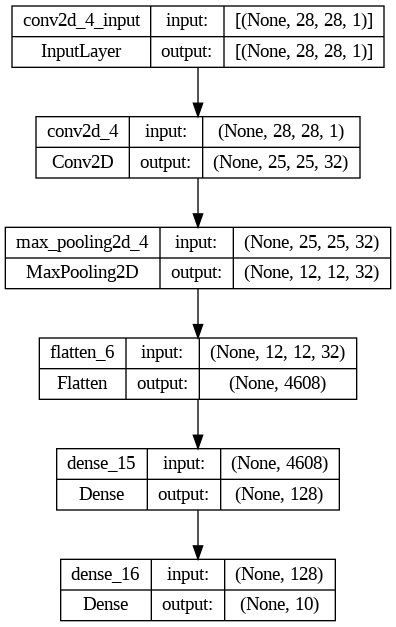

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model_architecture_CNN1.png',
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.4384 - accuracy: 0.8447 - val_loss: 0.3359 - val_accuracy: 0.8825
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3015 - accuracy: 0.8895 - val_loss: 0.3005 - val_accuracy: 0.8925
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2522 - accuracy: 0.9060 - val_loss: 0.3136 - val_accuracy: 0.8873
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2190 - accuracy: 0.9184 - val_loss: 0.2610 - val_accuracy: 0.9066
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1872 - accuracy: 0.9306 - val_loss: 0.2586 - val_accuracy: 0.9074
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1601 - accuracy: 0.9406 - val_loss: 0.2682 - val_accuracy: 0.9105
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1409 - accuracy: 0.9483 - val_loss: 0.2753 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

<Figure size 1200x1200 with 0 Axes>

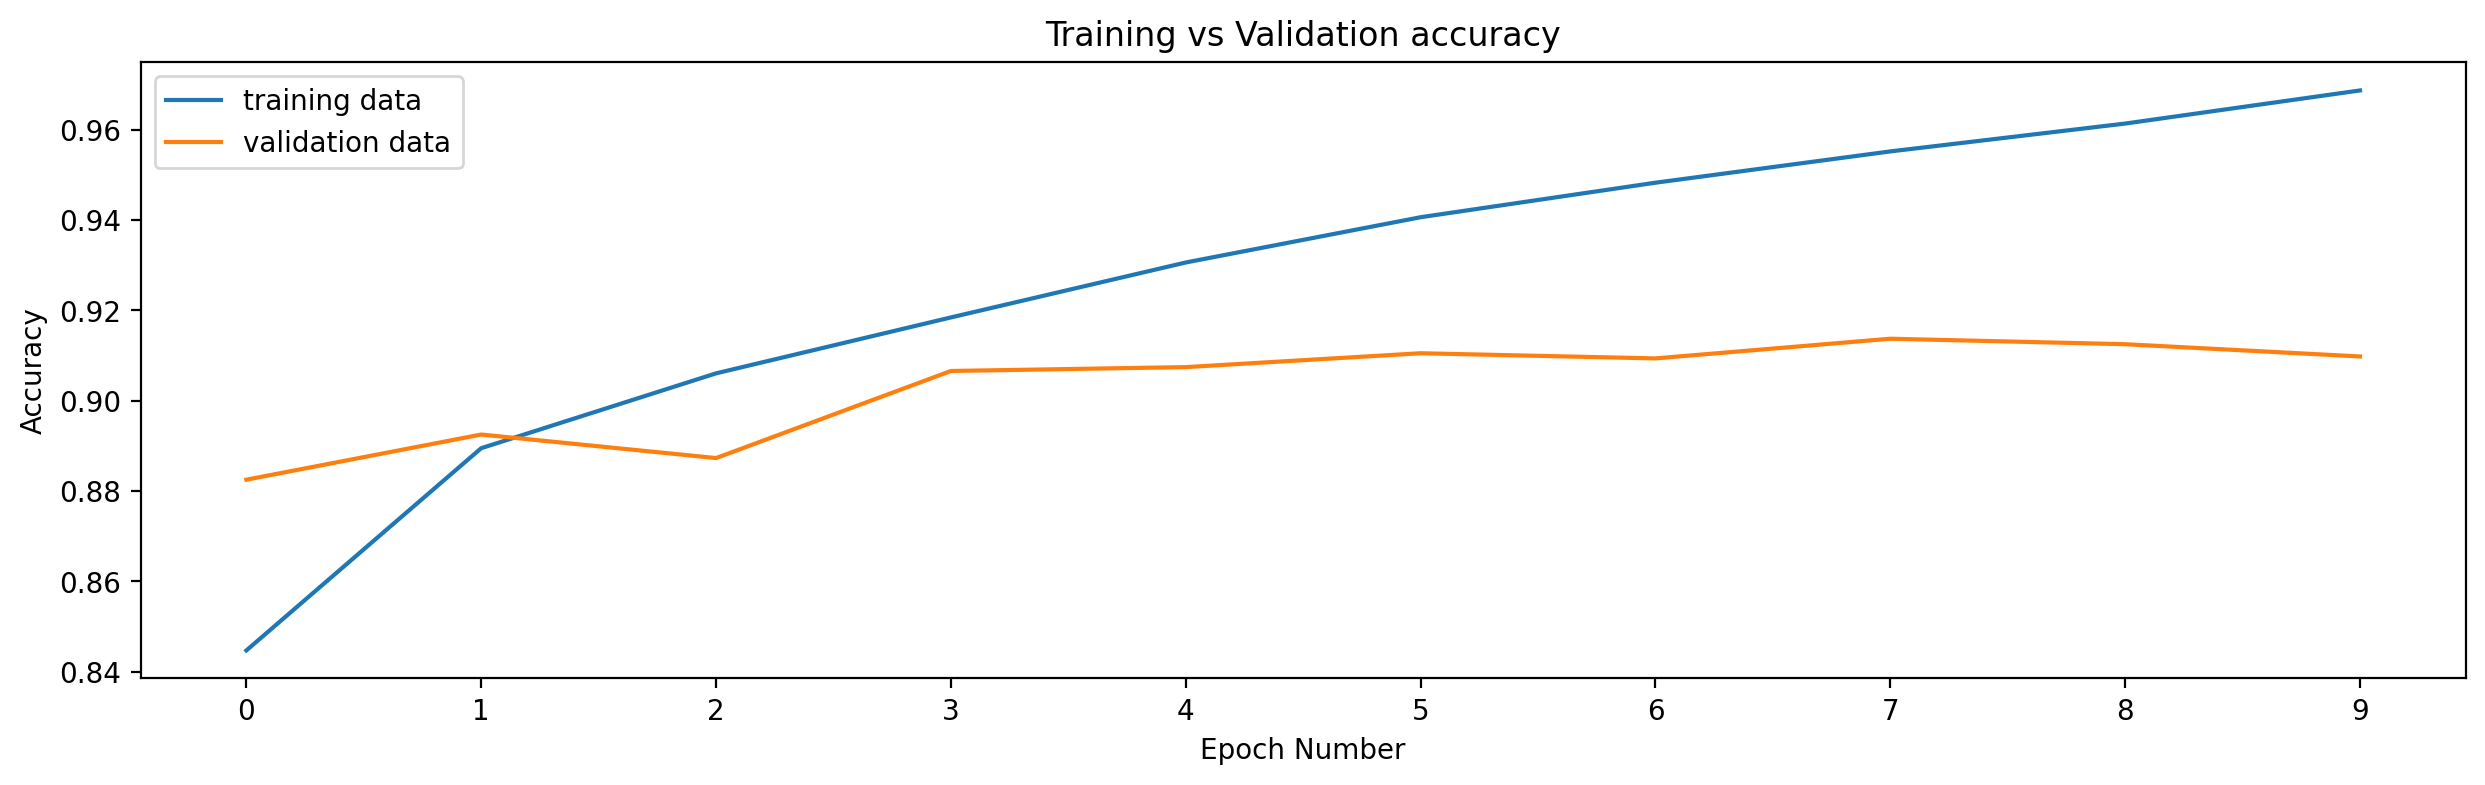

In [ ]:
# Accuracy plot curve for Training and Validation

plt.figure(figsize=(6, 6))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

<Figure size 1200x1200 with 0 Axes>

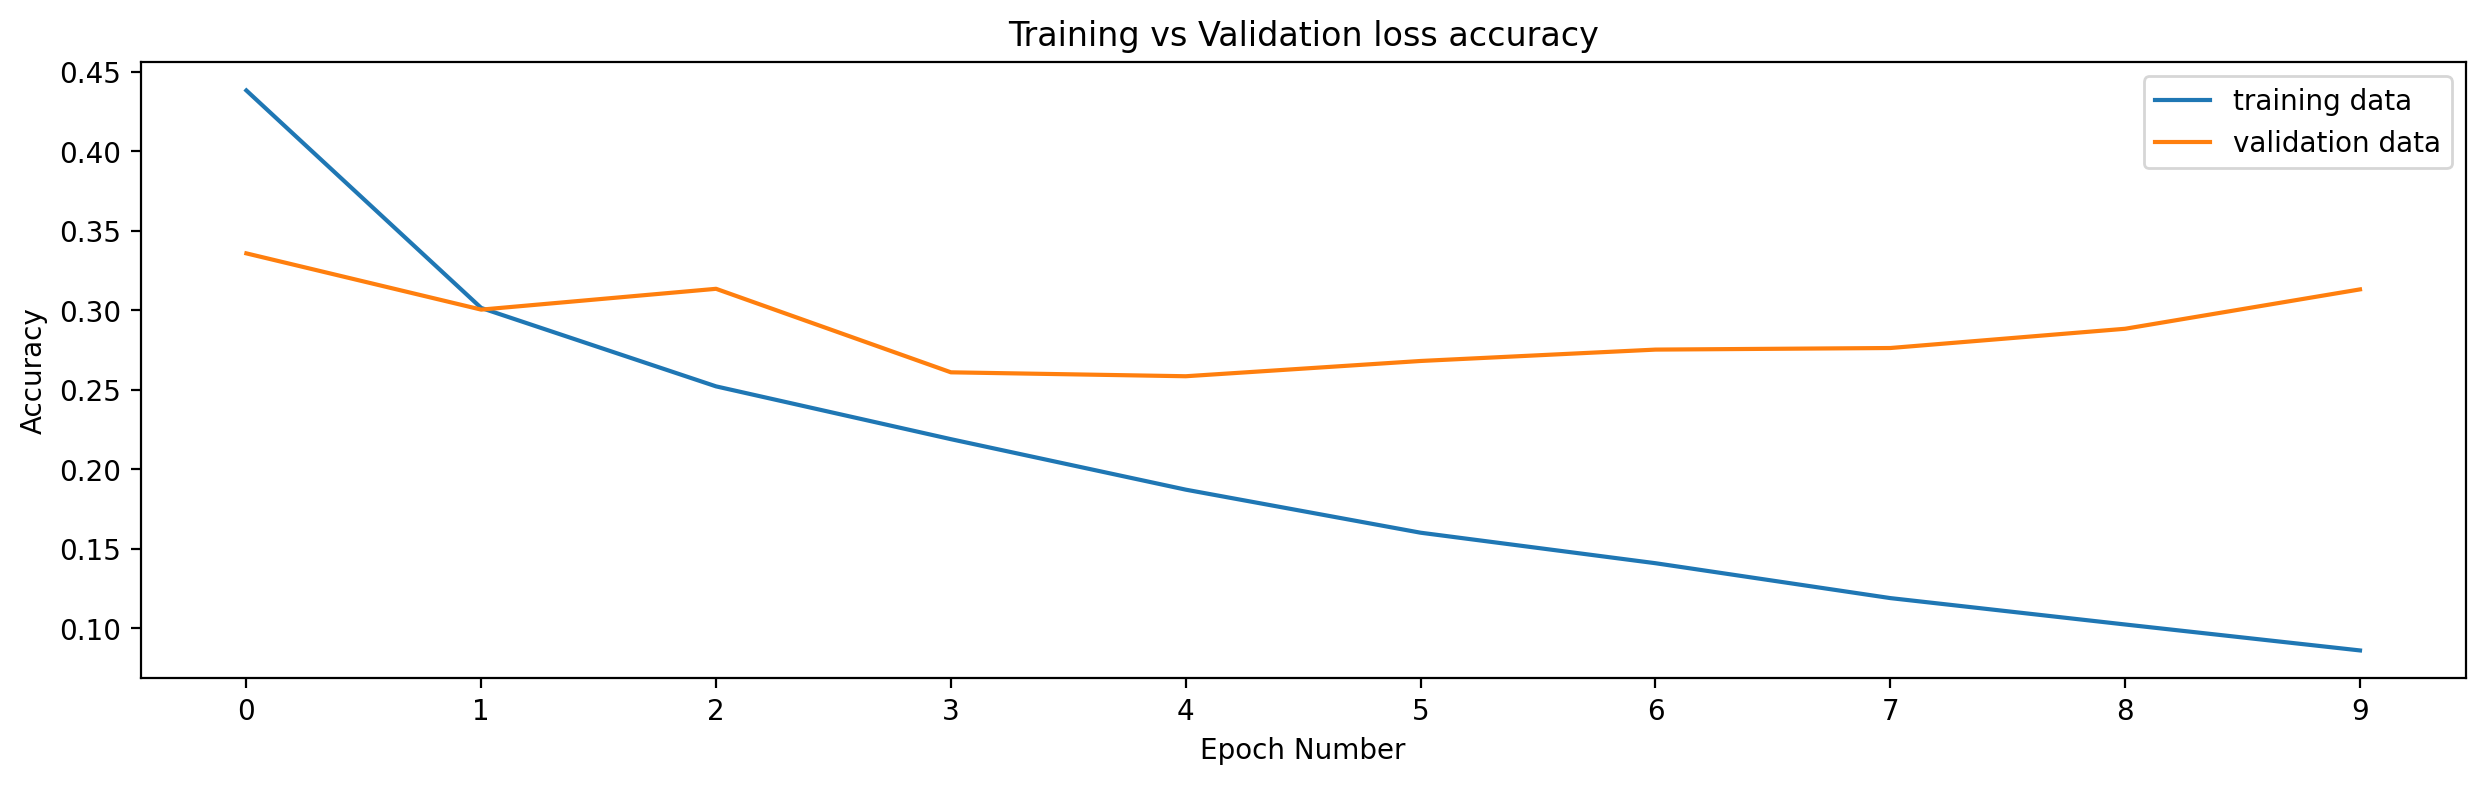

In [ ]:
# Loss plot curve for training and validation

plt.figure(figsize=(6, 6))
losses[['loss','val_loss']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation loss accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

In [ ]:
# Calculating train accuracy

print("Train dataset")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss: ", train_loss)
print("Train Accuracy: ", train_accuracy)

Train dataset
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0674 - accuracy: 0.9770
Train Loss:  0.06744761765003204
Train Accuracy:  0.976976215839386


In [ ]:
# Calculating validation accuracy

print("Validation dataset")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

Validation dataset
438/438 [==============================] - 1s 3ms/step - loss: 0.3132 - accuracy: 0.9098
Validation Loss:  0.3132264018058777
Validation Accuracy:  0.9097856879234314


In [ ]:
# Calculating test accuracy

print("Test accuracy")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test accuracy
438/438 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.9046
Test Loss:  0.3168269097805023
Test Accuracy:  0.9045714139938354


In [ ]:
predictions = model.predict(X_test)

predicted_labels_1 = np.argmax(predictions,axis=1)
y_test1 = np.argmax(y_test, axis=1)

438/438 [==============================] - 1s 2ms/step


###### Classification Report

In [ ]:
# Classification report

print(classification_report(y_test1,predicted_labels_1))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1362
           1       0.98      0.98      0.98      1386
           2       0.83      0.87      0.85      1390
           3       0.91      0.90      0.91      1444
           4       0.89      0.79      0.83      1391
           5       0.97      0.99      0.98      1432
           6       0.72      0.79      0.75      1404
           7       0.97      0.94      0.96      1387
           8       0.97      0.99      0.98      1403
           9       0.96      0.97      0.97      1401

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



###### Predicting a Random Image

1/1 [==============================] - 0s 16ms/step


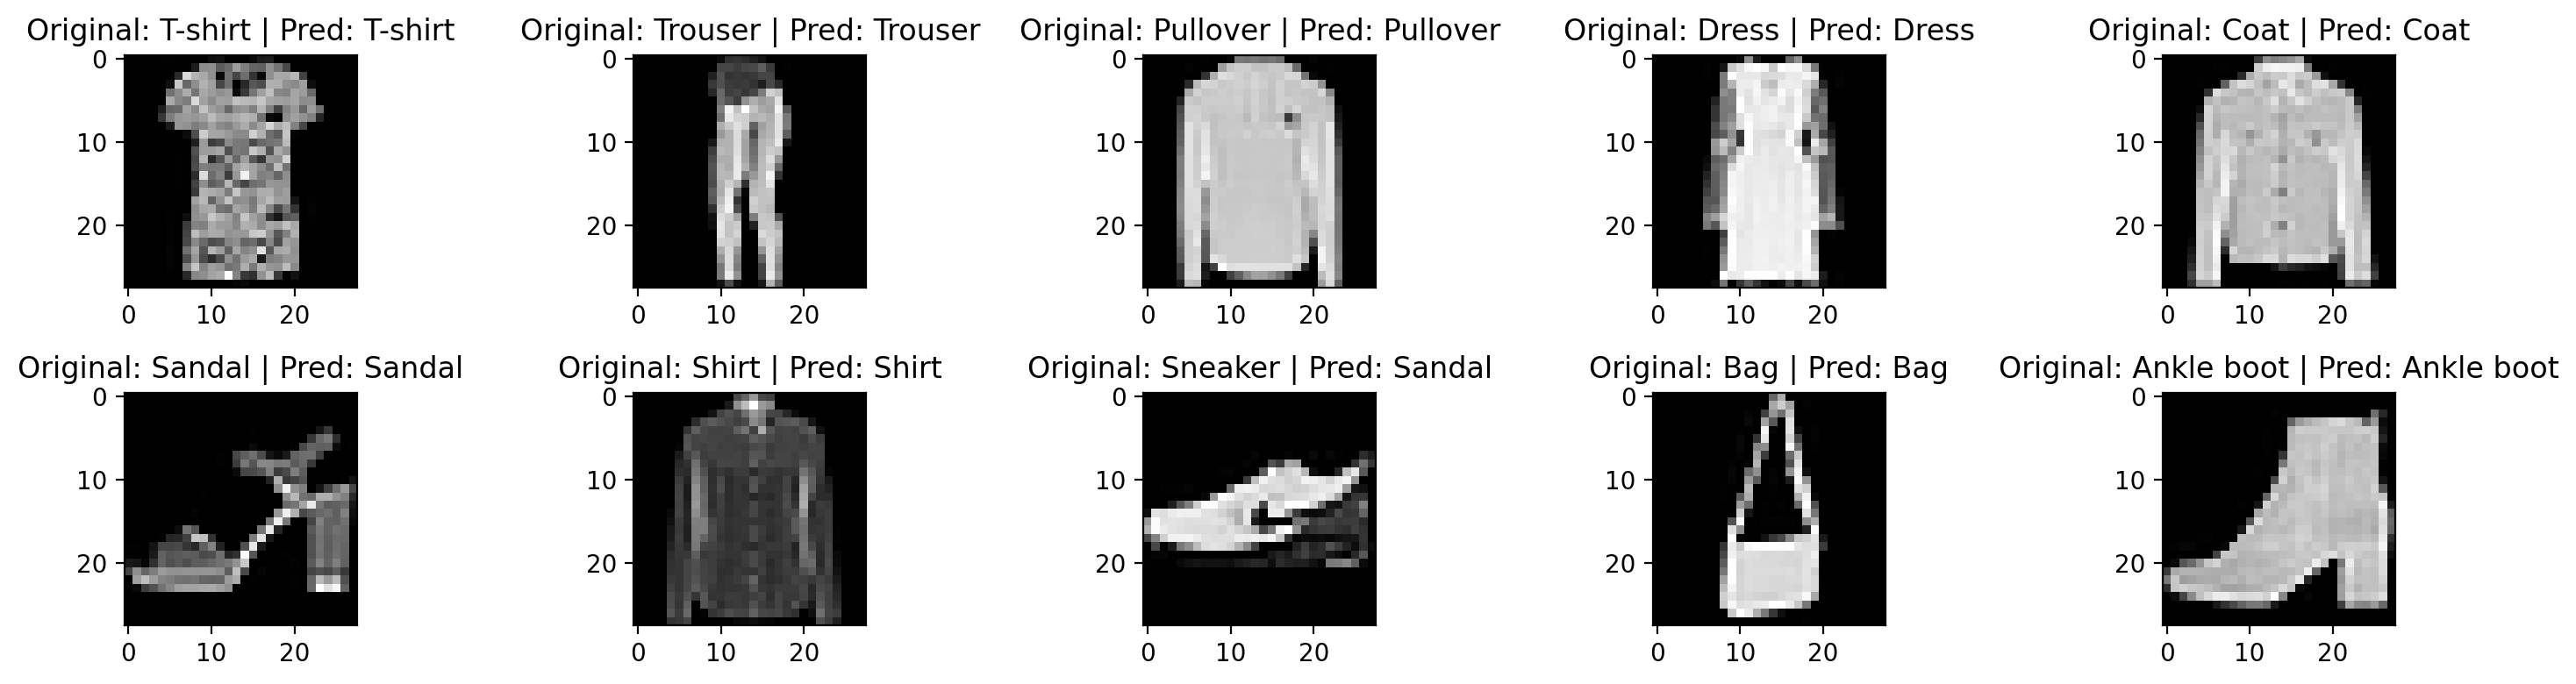

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in class_num:
    plt.subplot(2, 5, i + 1)

    df_new = df[df['label'] == i].iloc[456]
    test = df_new.drop('label').to_numpy().reshape(28, 28)

    plt.imshow(test, cmap='gray')

    pred = model.predict(test.reshape(1, 28, 28, 1))
    idx = np.argmax(pred[0])
    pred_class = target_class[idx]

    plt.title('Original: {} | Pred: {}'.format(target_class[i], pred_class))

plt.tight_layout()
plt.show()

###### Confusion matrix

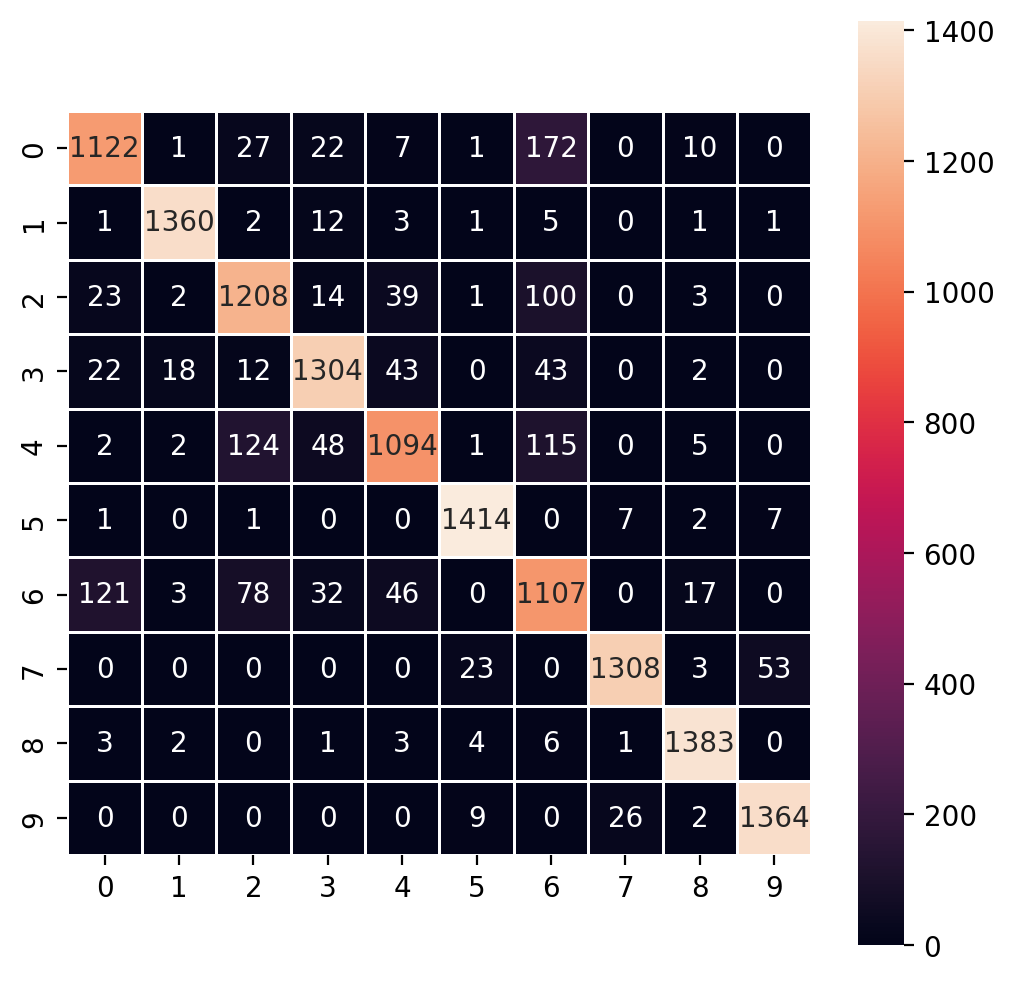

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test1, predicted_labels_1)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()

#### Model 3 - CNN2

Building the neural network model requires setting up the layers of the model, and then compiling the model.

We are using the Sequential Keras model which has a Convolution2D and MaxPooling2D layer. The MaxPooling layer acts as a sort of downsampling using max values in a region. The key difference with this model is the strides hyperparameter in the convolution layer. strides refer to the step size the convolutional filter takes when moving across the input data. Strides control how much the filter shifts (moves) at each step during the convolution operation.

After that we will use Flatten layer to convert multidimensional parameters to vector. We have a dense hidden layer with 128 neurons learn intricate patterns with the ReLU activation function.

The ReLU activation functions introduce non-linearity to the model, and the Softmax activation in the output layer provides normalized probabilities for each class.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=[1,1], input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               589952    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

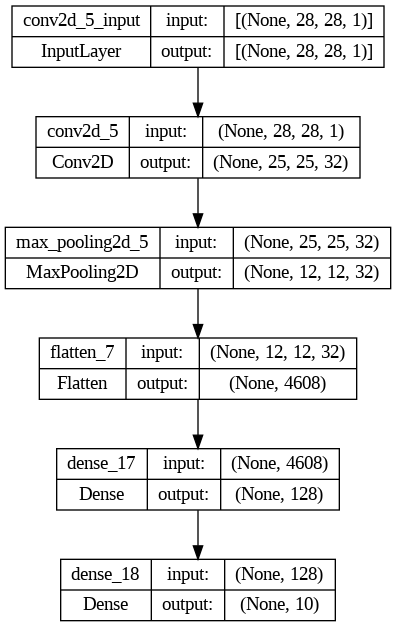

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model_architecture_CNN2.png',
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.4384 - accuracy: 0.8449 - val_loss: 0.3289 - val_accuracy: 0.8846
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3000 - accuracy: 0.8917 - val_loss: 0.2844 - val_accuracy: 0.9008
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2551 - accuracy: 0.9078 - val_loss: 0.2693 - val_accuracy: 0.9049
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2204 - accuracy: 0.9192 - val_loss: 0.2624 - val_accuracy: 0.9055
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1923 - accuracy: 0.9291 - val_loss: 0.2475 - val_accuracy: 0.9130
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1633 - accuracy: 0.9395 - val_loss: 0.2706 - val_accuracy: 0.9110
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1450 - accuracy: 0.9465 - val_loss: 0.2592 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

<Figure size 1200x1200 with 0 Axes>

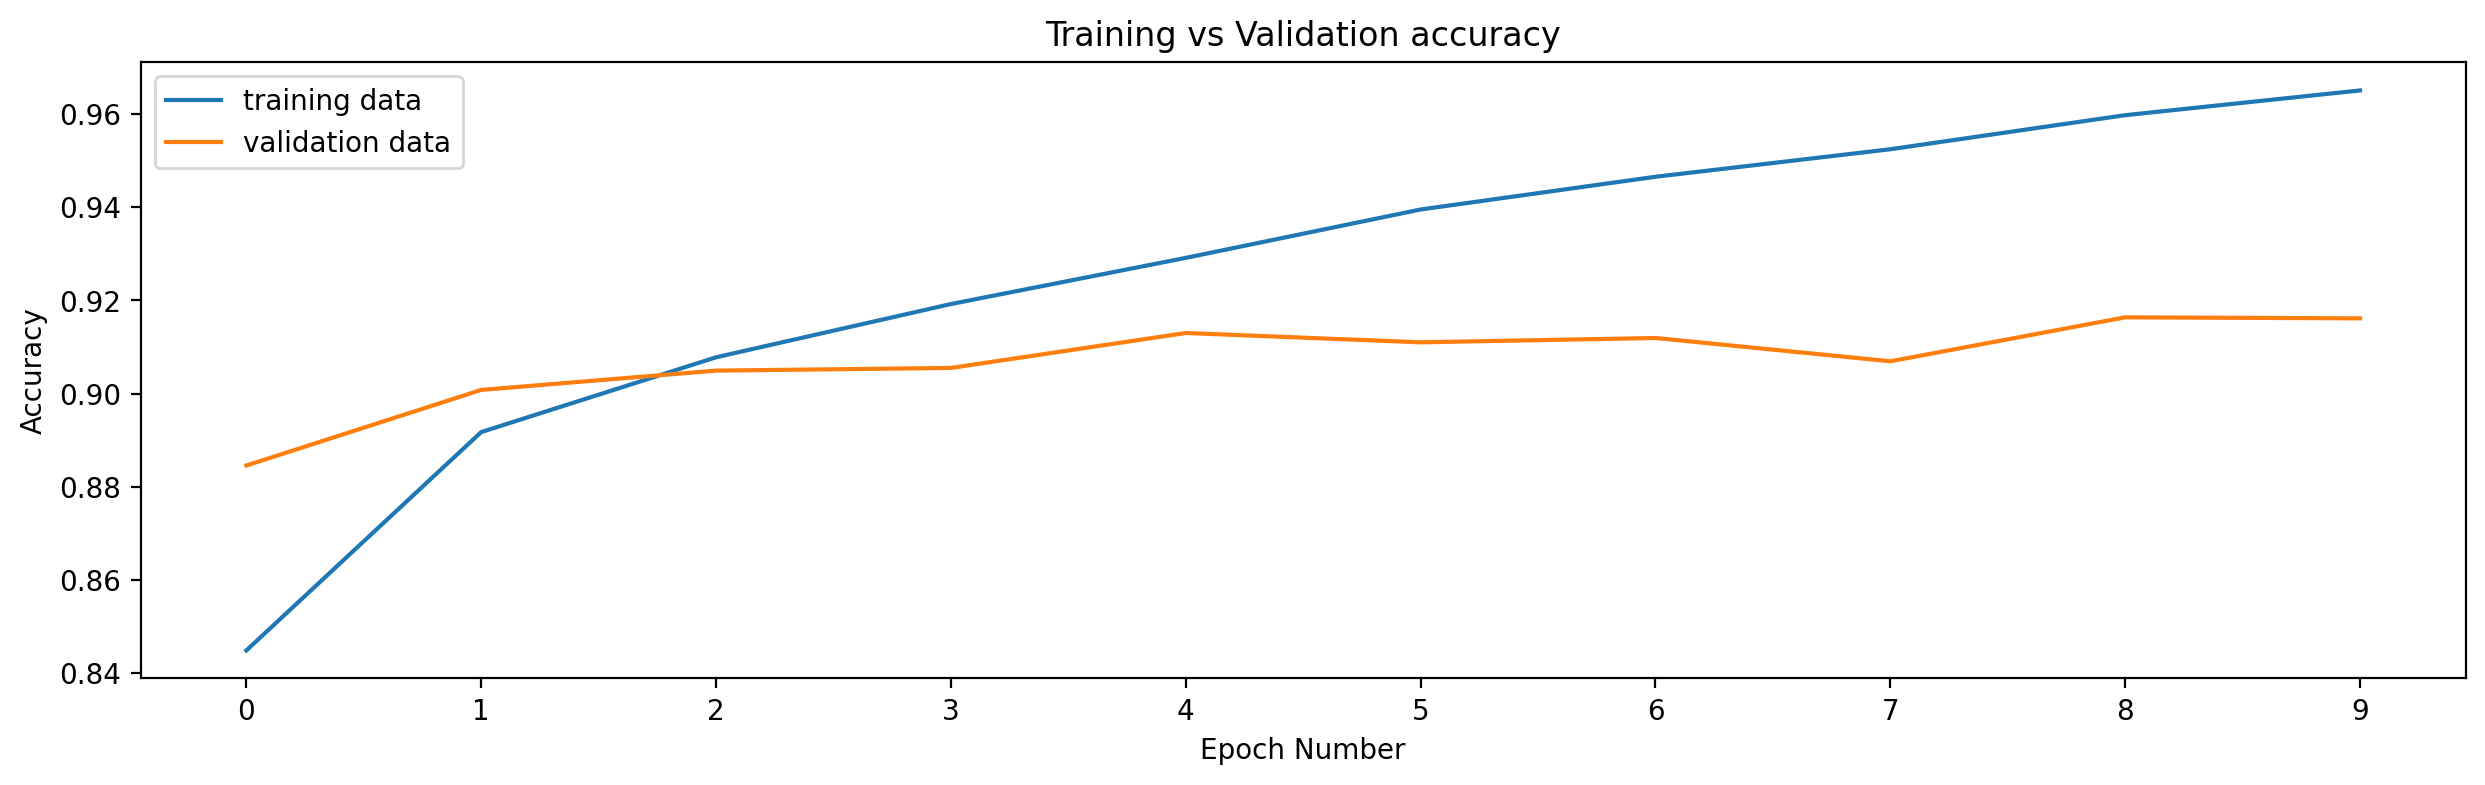

In [ ]:
# Accuracy plot curve for Training and Validation

plt.figure(figsize=(6, 6))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

<Figure size 1200x1200 with 0 Axes>

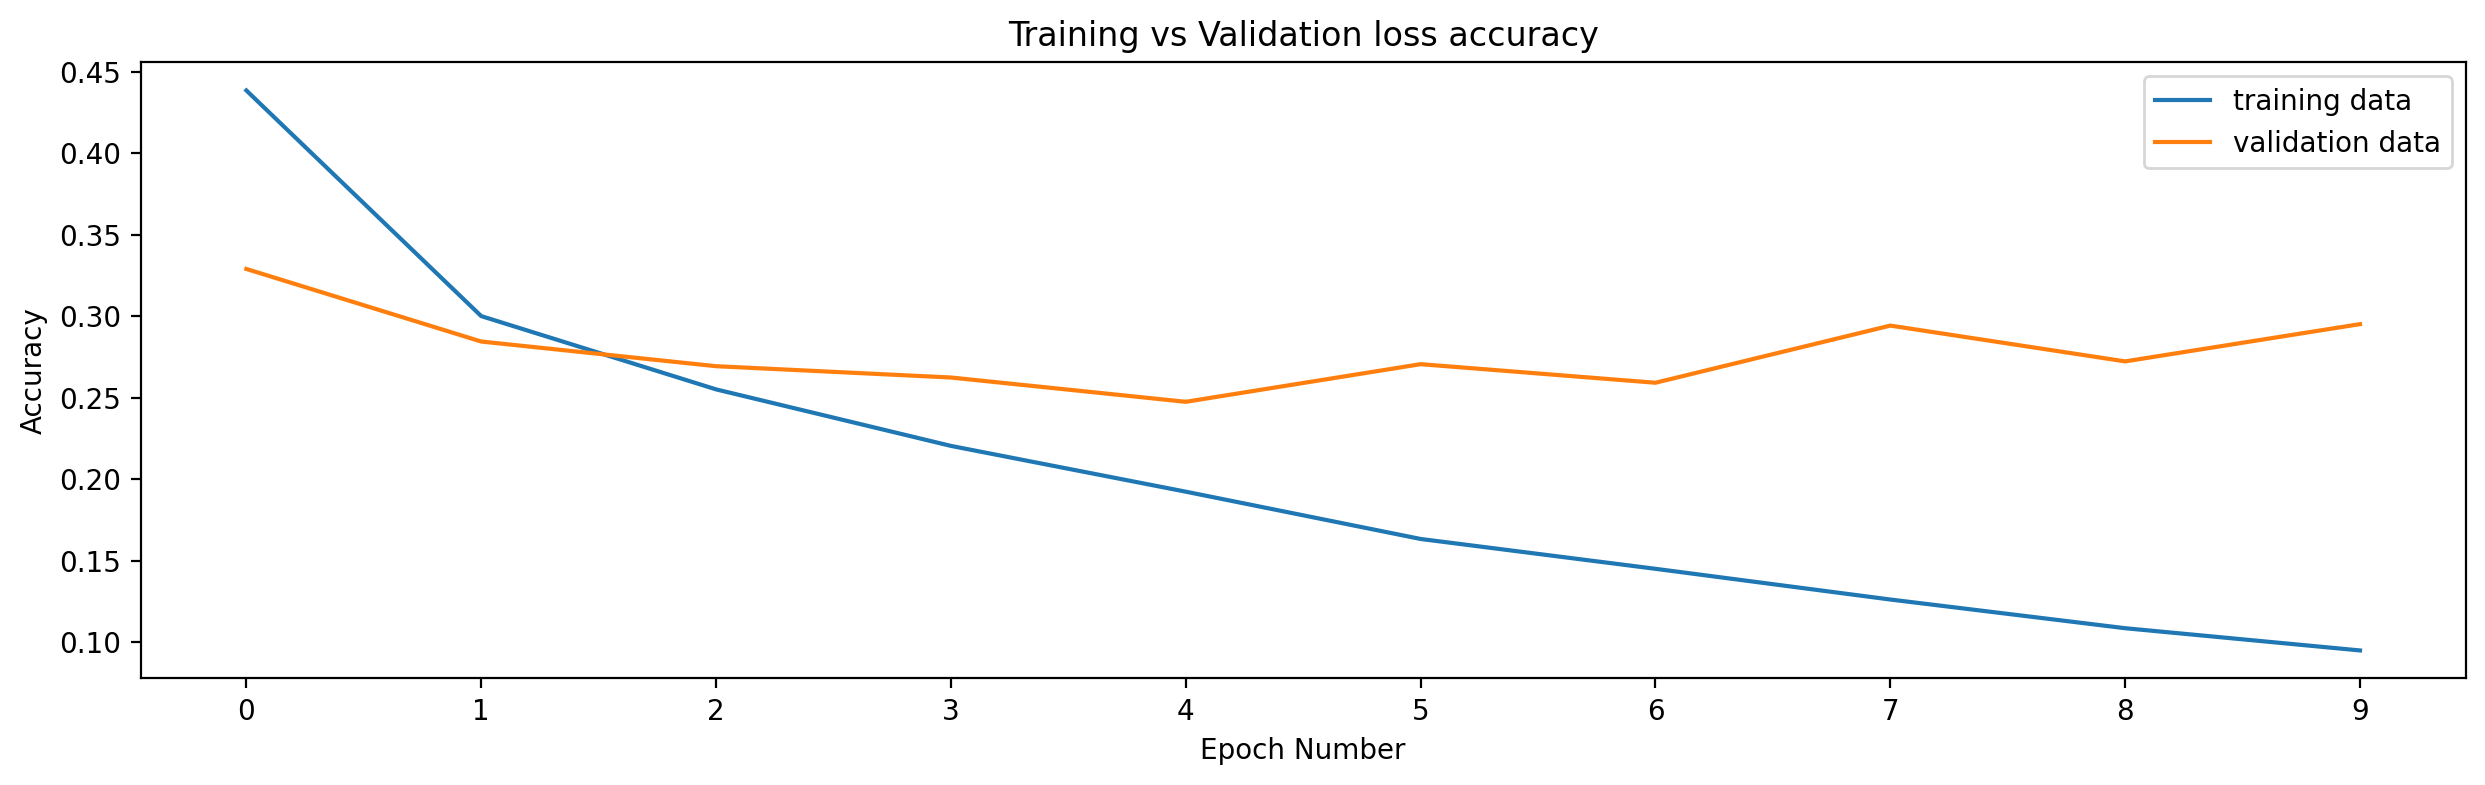

In [ ]:
# Loss plot curve for training and validation

plt.figure(figsize=(6, 6))
losses[['loss','val_loss']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation loss accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

In [ ]:
# Calculating train accuracy

print("Train dataset")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss: ", train_loss)
print("Train Accuracy: ", train_accuracy)

Train dataset
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0669 - accuracy: 0.9767
Train Loss:  0.06689365208148956
Train Accuracy:  0.9767143130302429


In [ ]:
# Calculating validation accuracy

print("Validation dataset")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

Validation dataset
438/438 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.9161
Validation Loss:  0.29511821269989014
Validation Accuracy:  0.9161428809165955


In [ ]:
# Calculating test accuracy

print("Test accuracy")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test accuracy
438/438 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.9109
Test Loss:  0.301052987575531
Test Accuracy:  0.9108571410179138


In [ ]:
predictions = model.predict(X_test)

predicted_labels_2 = np.argmax(predictions,axis=1)
y_test2 = np.argmax(y_test, axis=1)

438/438 [==============================] - 1s 2ms/step


###### Classification Report

In [ ]:
# Classification report

print(classification_report(y_test2,predicted_labels_2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1362
           1       0.99      0.98      0.99      1386
           2       0.88      0.83      0.85      1390
           3       0.92      0.90      0.91      1444
           4       0.82      0.88      0.85      1391
           5       0.98      0.98      0.98      1432
           6       0.76      0.73      0.75      1404
           7       0.96      0.98      0.97      1387
           8       0.97      0.98      0.98      1403
           9       0.98      0.96      0.97      1401

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



###### Predicting a Random Image

1/1 [==============================] - 0s 16ms/step


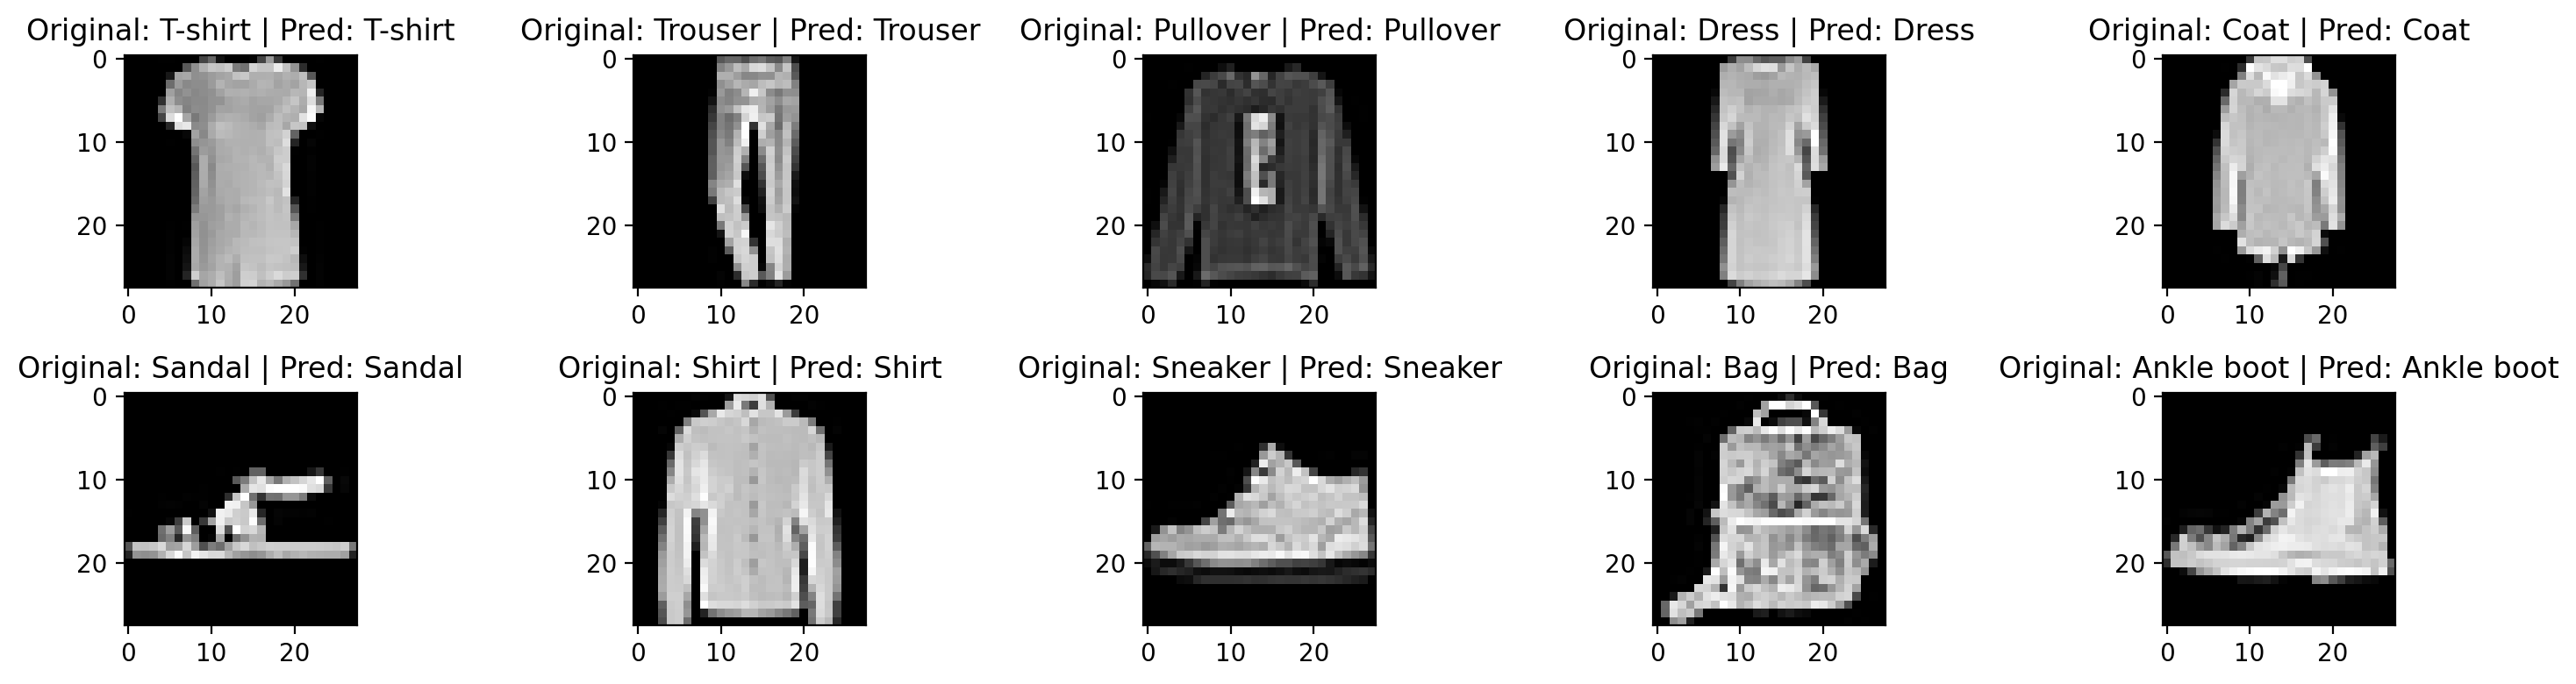

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in class_num:
    plt.subplot(2, 5, i + 1)

    df_new = df[df['label'] == i].iloc[34]
    test = df_new.drop('label').to_numpy().reshape(28, 28)

    plt.imshow(test, cmap='gray')

    pred = model.predict(test.reshape(1, 28, 28, 1))
    idx = np.argmax(pred[0])
    pred_class = target_class[idx]

    plt.title('Original: {} | Pred: {}'.format(target_class[i], pred_class))

plt.tight_layout()
plt.show()

###### Confusion Matrix

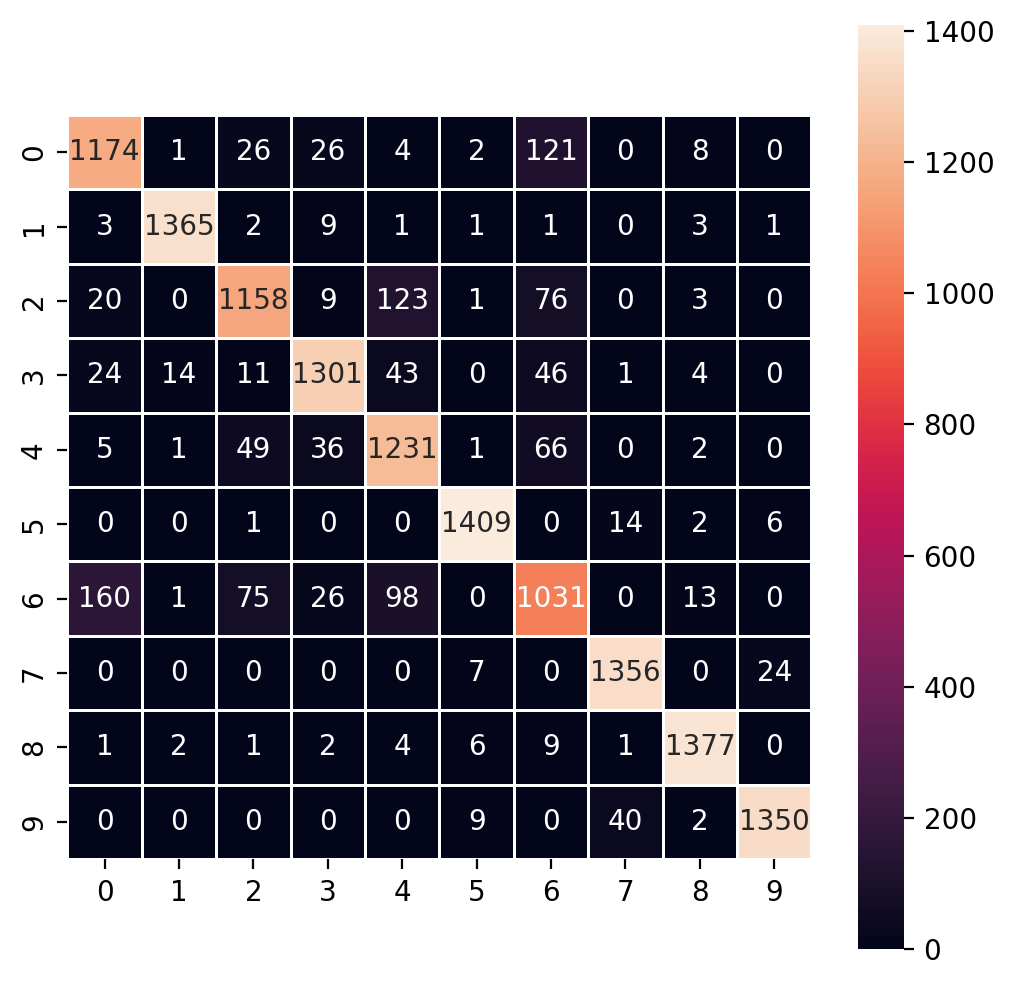

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test2, predicted_labels_2)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()

#### Model 3 - CNN3

Building the neural network model requires setting up the layers of the model, and then compiling the model.

We are using Sequential Keras model which has two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region. After that we will use Flatten layer to convert multidimensional parameters to vector. We have a dense hidden layer with 128 neurons learn intricate patterns with the ReLU activation function.

The ReLU activation functions introduce non-linearity to the model, and the Softmax activation in the output layer provides normalized probabilities for each class.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=[1,1], input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=[1,1], activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Droupout to ensure generalization
model.add(Dropout(0.2))
# Final output classifier layer with 10 classes
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

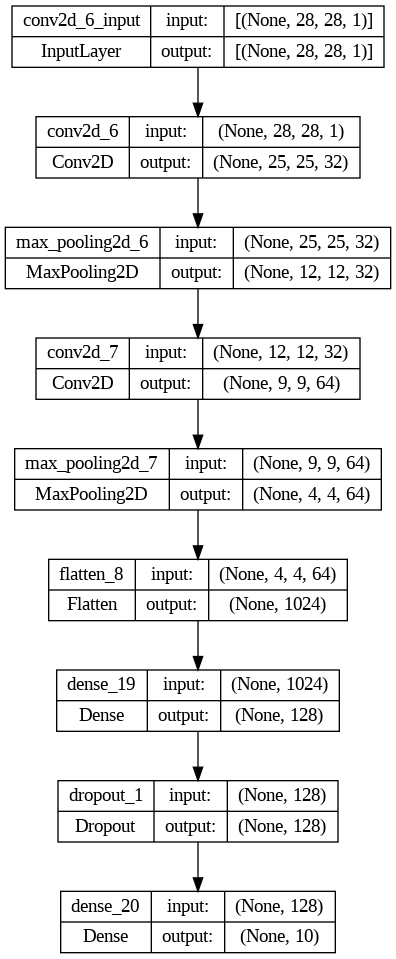

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model_architecture_CNN3.png',
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.5609 - accuracy: 0.7954 - val_loss: 0.3820 - val_accuracy: 0.8587
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3696 - accuracy: 0.8653 - val_loss: 0.3274 - val_accuracy: 0.8795
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3184 - accuracy: 0.8809 - val_loss: 0.3181 - val_accuracy: 0.8816
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2817 - accuracy: 0.8952 - val_loss: 0.2879 - val_accuracy: 0.8906
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2563 - accuracy: 0.9043 - val_loss: 0.2828 - val_accuracy: 0.8984
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2340 - accuracy: 0.9122 - val_loss: 0.2801 - val_accuracy: 0.8999
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2176 - accuracy: 0.9187 - val_loss: 0.2801 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

<Figure size 1200x1200 with 0 Axes>

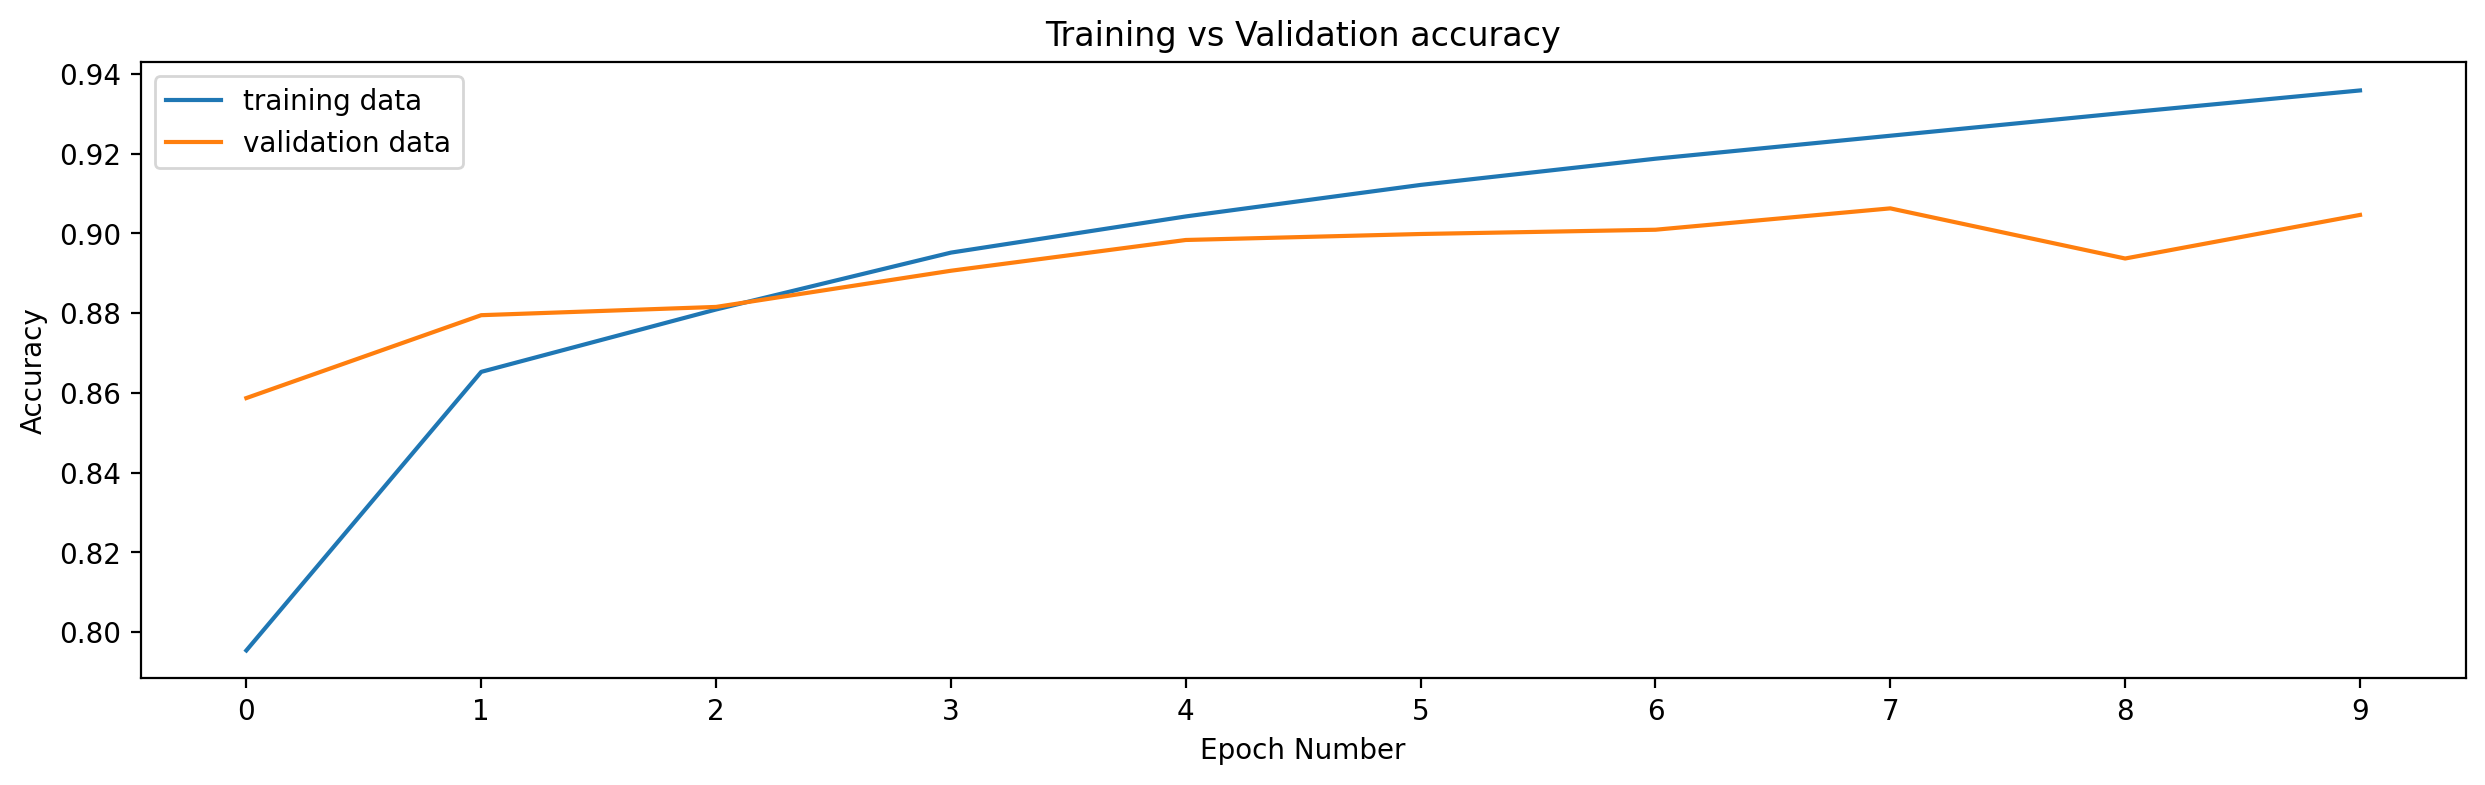

In [ ]:
# Accuracy plot curve for Training and Validation

plt.figure(figsize=(6, 6))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

<Figure size 1200x1200 with 0 Axes>

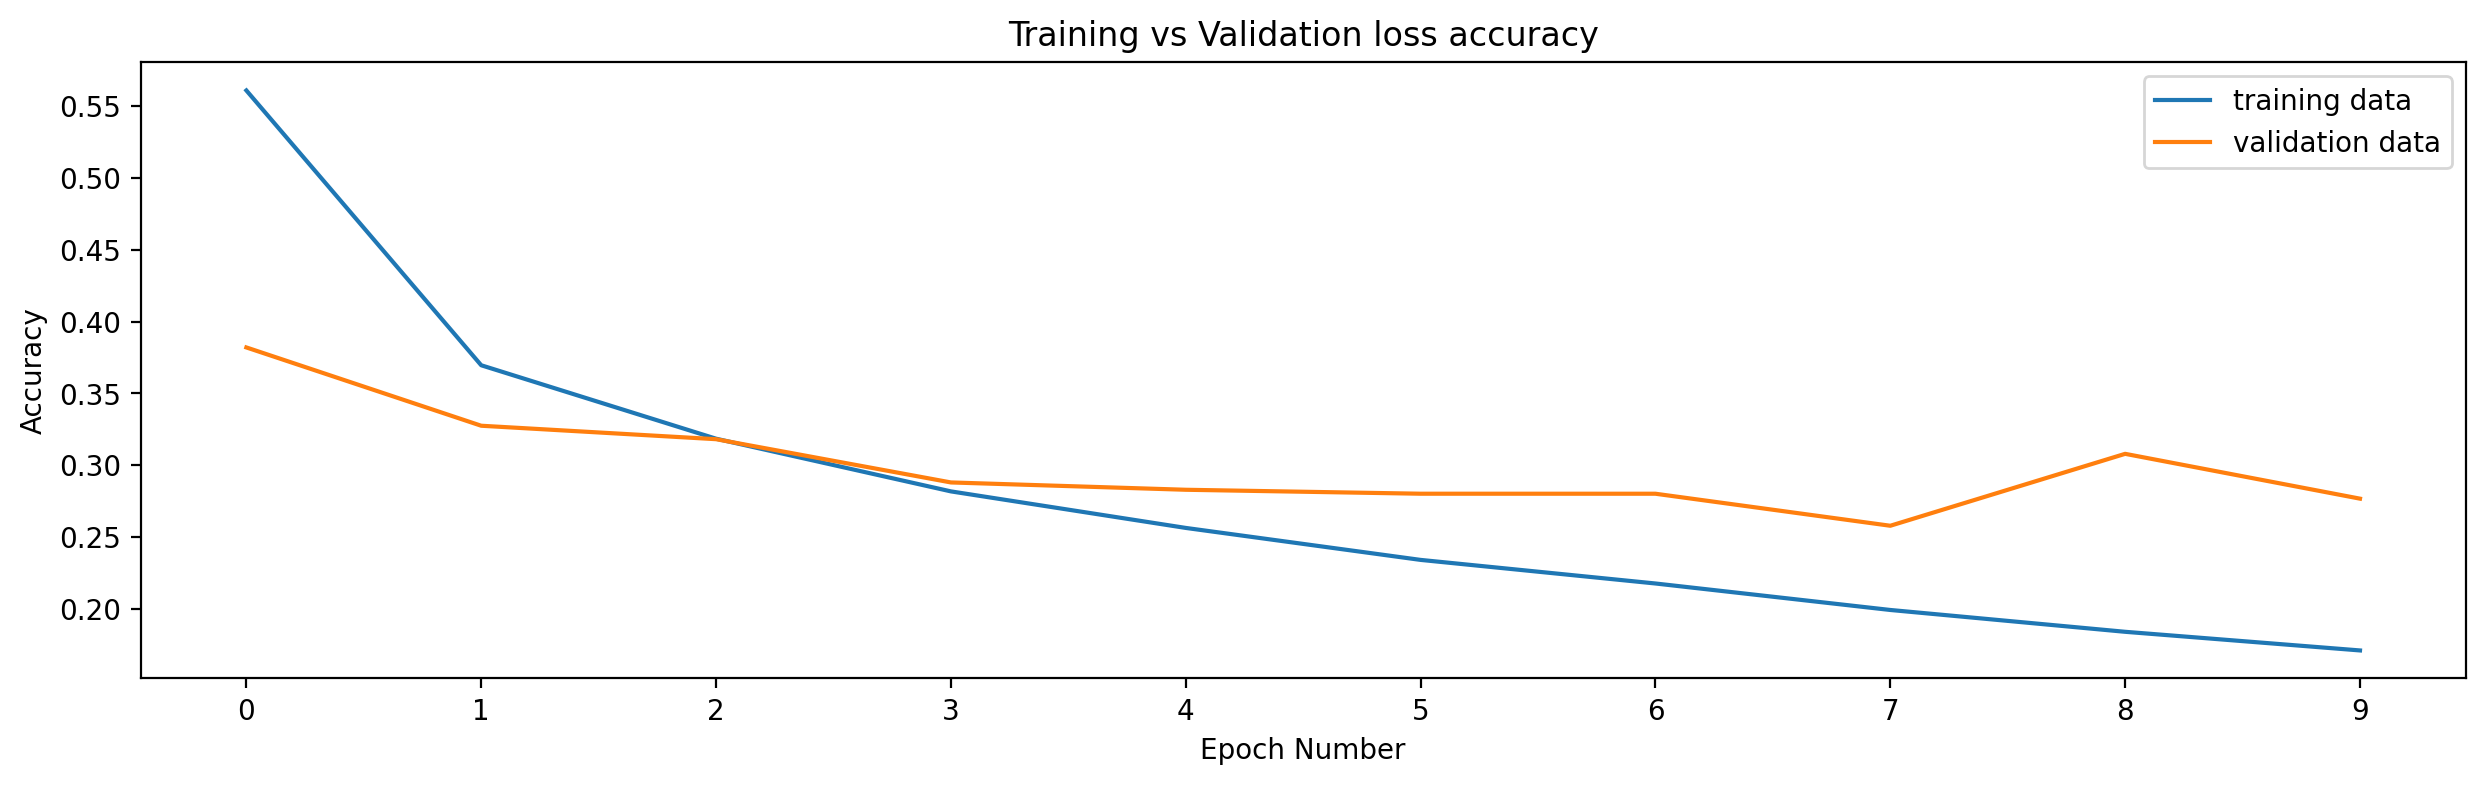

In [ ]:
# Loss plot curve for training and validation

plt.figure(figsize=(6, 6))
losses[['loss','val_loss']].plot()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.title("Training vs Validation loss accuracy")
plt.legend(['training data', 'validation data'])
plt.show()

In [ ]:
# Calculating train accuracy

print("Train dataset")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Loss: ", train_loss)
print("Train Accuracy: ", train_accuracy)

Train dataset
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1295 - accuracy: 0.9512
Train Loss:  0.12948326766490936
Train Accuracy:  0.9512143135070801


In [ ]:
# Calculating validation accuracy

print("Validation dataset")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)

Validation dataset
438/438 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.9046
Validation Loss:  0.27664512395858765
Validation Accuracy:  0.9046428799629211


In [ ]:
# Calculating test accuracy

print("Test accuracy")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test accuracy
438/438 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.9042
Test Loss:  0.27726155519485474
Test Accuracy:  0.9042142629623413


In [ ]:
predictions = model.predict(X_test)

predicted_labels_3 = np.argmax(predictions,axis=1)
y_test3 = np.argmax(y_test, axis=1)

438/438 [==============================] - 1s 2ms/step


###### Classification Report

In [ ]:
# Classification report

print(classification_report(y_test3,predicted_labels_3))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1362
           1       0.99      0.98      0.98      1386
           2       0.81      0.90      0.85      1390
           3       0.90      0.92      0.91      1444
           4       0.86      0.79      0.83      1391
           5       0.99      0.98      0.98      1432
           6       0.78      0.67      0.72      1404
           7       0.96      0.96      0.96      1387
           8       0.97      0.99      0.98      1403
           9       0.96      0.97      0.97      1401

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



###### Predicting a Random Image

1/1 [==============================] - 0s 19ms/step


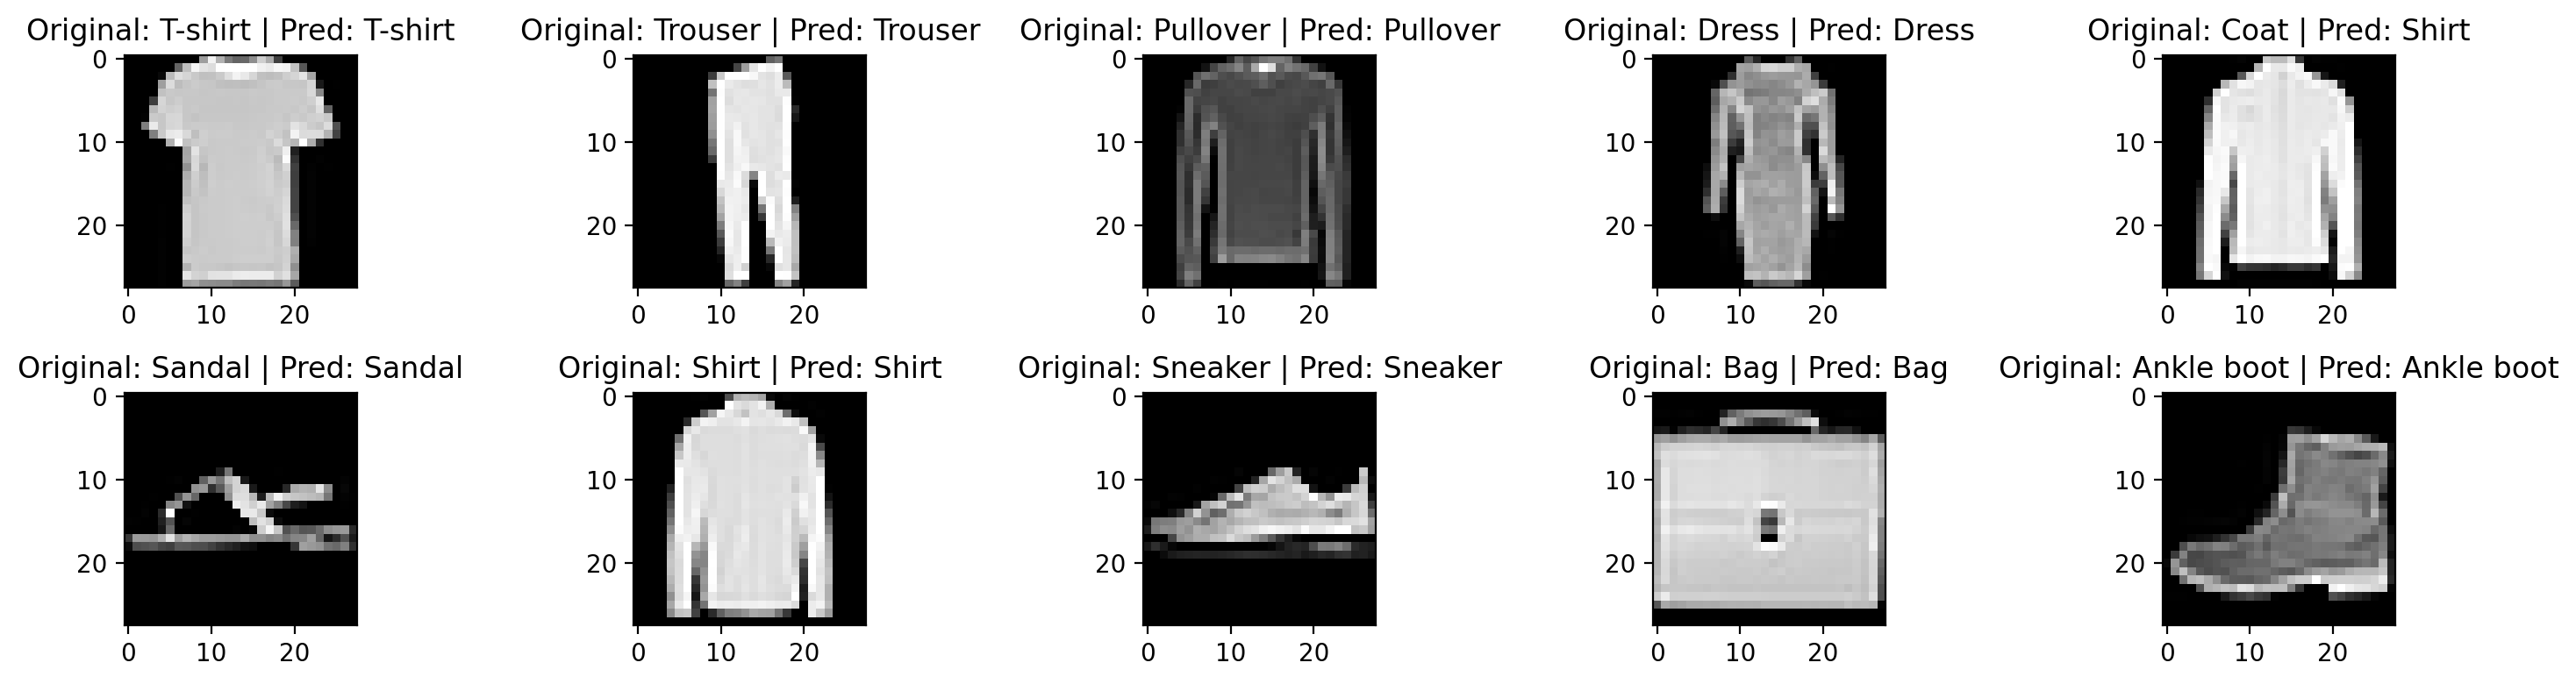

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['figure.dpi'] = 200

for i in class_num:
    plt.subplot(2, 5, i + 1)

    df_new = df[df['label'] == i].iloc[675]
    test = df_new.drop('label').to_numpy().reshape(28, 28)

    plt.imshow(test, cmap='gray')

    pred = model.predict(test.reshape(1, 28, 28, 1))
    idx = np.argmax(pred[0])
    pred_class = target_class[idx]

    plt.title('Original: {} | Pred: {}'.format(target_class[i], pred_class))

plt.tight_layout()
plt.show()

###### Confusion Matrix

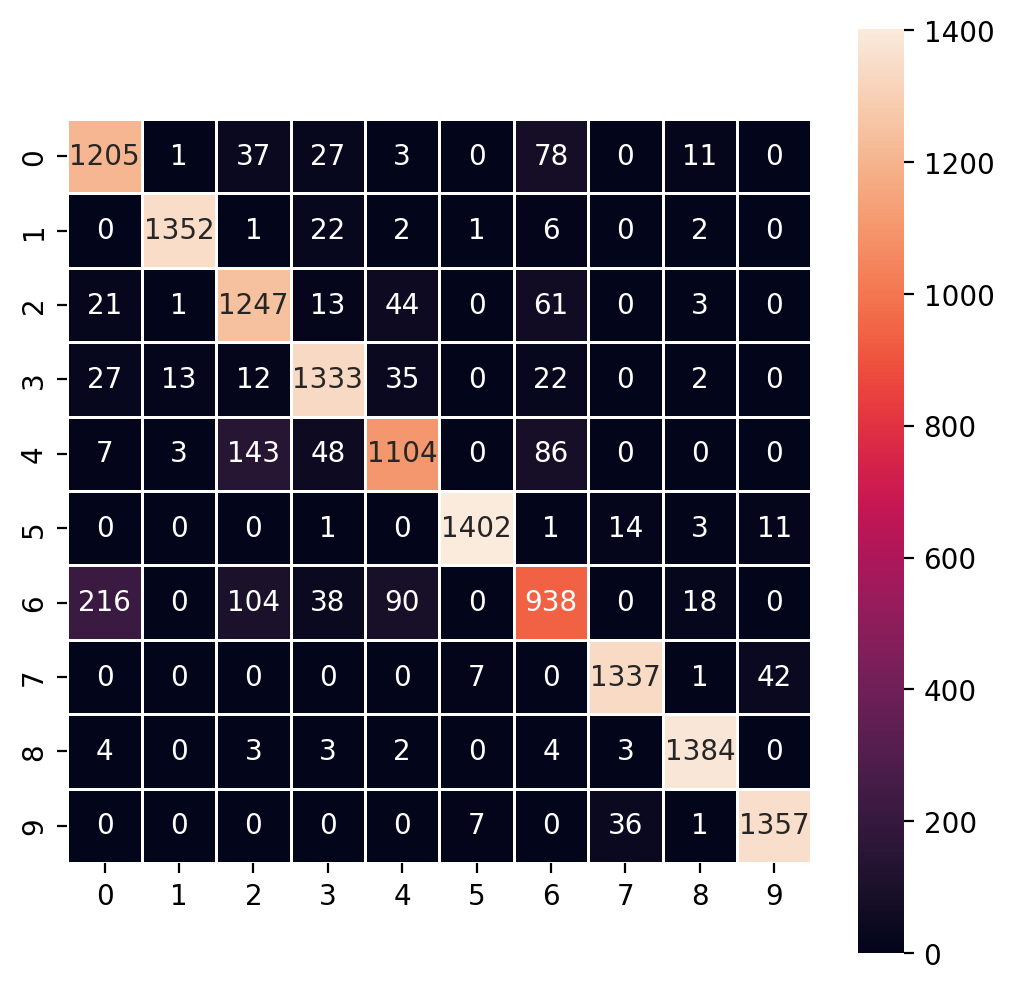

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test3, predicted_labels_3)
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()

### Conclusion

Based on the analysis of the presented graphs and the information provided in the classification report, it can be deduced that both CNN Model 2 and Model 3 exhibit superior performance in terms of test accuracy, recall, precision, and F1-score.

Despite CNN Model 2 adopting a less complex architecture compared to Model 3, featuring a simpler design with a single pair of convolutional layers, it showcases competitive performance. Notably, Model 2 boasts a faster compilation time, given its relatively lower number of learning parameters in comparison to Model 3.

However, it's essential to note that CNN Model 2 displays signs of overfitting, evident in the notable gap between its high training accuracy of 97.4% and the slightly lower testing accuracy of 90.6%, resulting in a 7% accuracy differential. In contrast, CNN Model 3, with its two pairs of convolutional layers, demonstrates a more balanced performance and proves to be a preferable choice in terms of mitigating overfitting concerns.